### Created by - Sanjana Pal

### Probelm Statement

- Forecast the   Airlines Passengers data set. Prepare a document for each model explaining 
how many dummy variables you have created and RMSE value for each model. Finally which model you will use for 
Forecasting.

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from sklearn.metrics import mean_squared_error
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
from pandas.plotting import lag_plot

In [2]:
# reading the data
df = pd.read_excel("Airlines+Data.xlsx")

# EDA

In [3]:
#display first five rows of data
df.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [4]:
# value counts
df['Passengers'].value_counts()

229    3
118    2
306    2
235    2
135    2
      ..
218    1
230    1
209    1
191    1
271    1
Name: Passengers, Length: 80, dtype: int64

In [5]:
# info show the dtypes and presence and absence of null value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


# VisualiZation

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

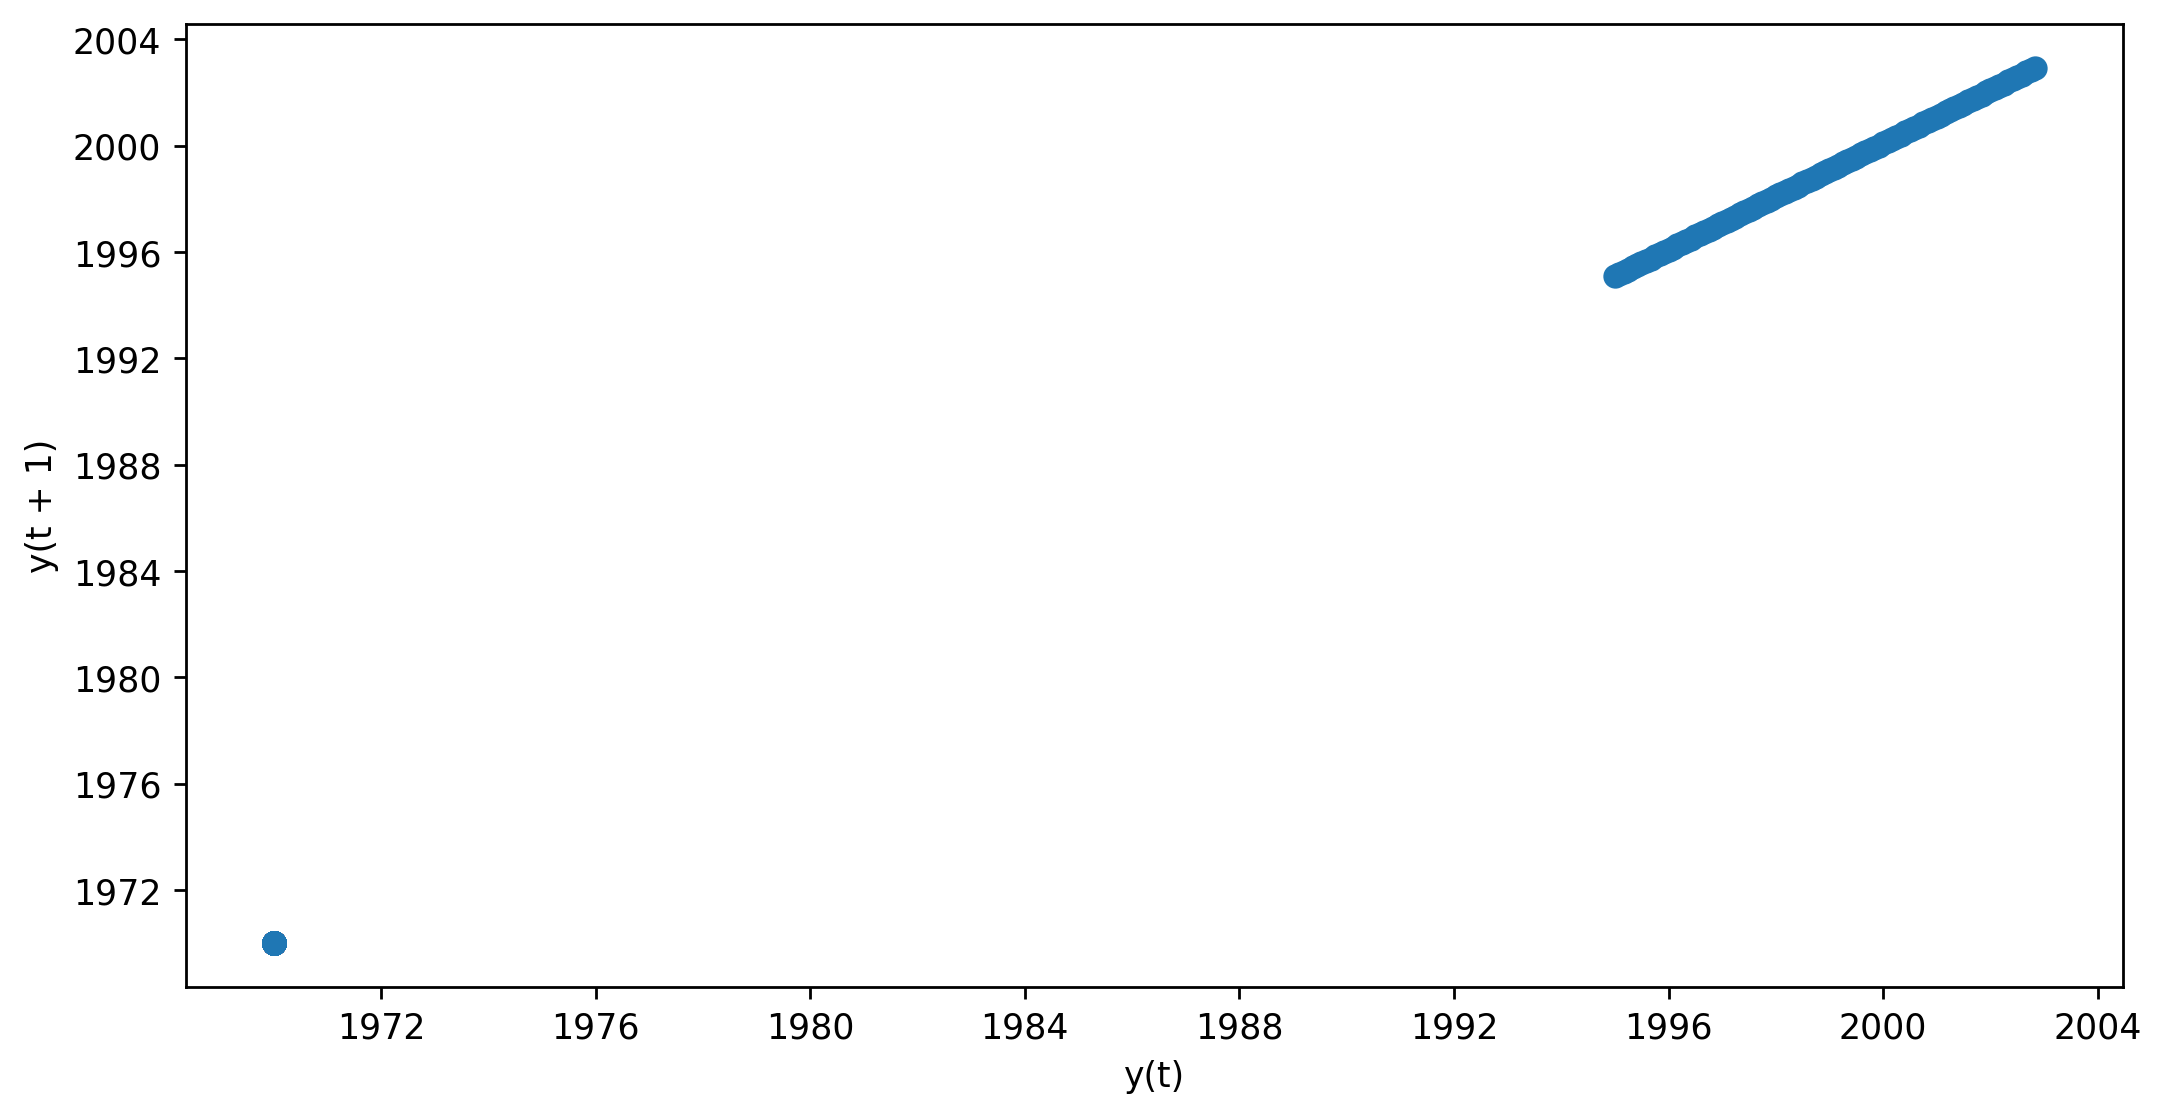

In [6]:
# convert month column into datetime object
df['Month'] = pd.to_datetime(df['Month'])
lag_plot(df)

In [7]:
df.set_index('Month',inplace=True)

<AxesSubplot:ylabel='Density'>

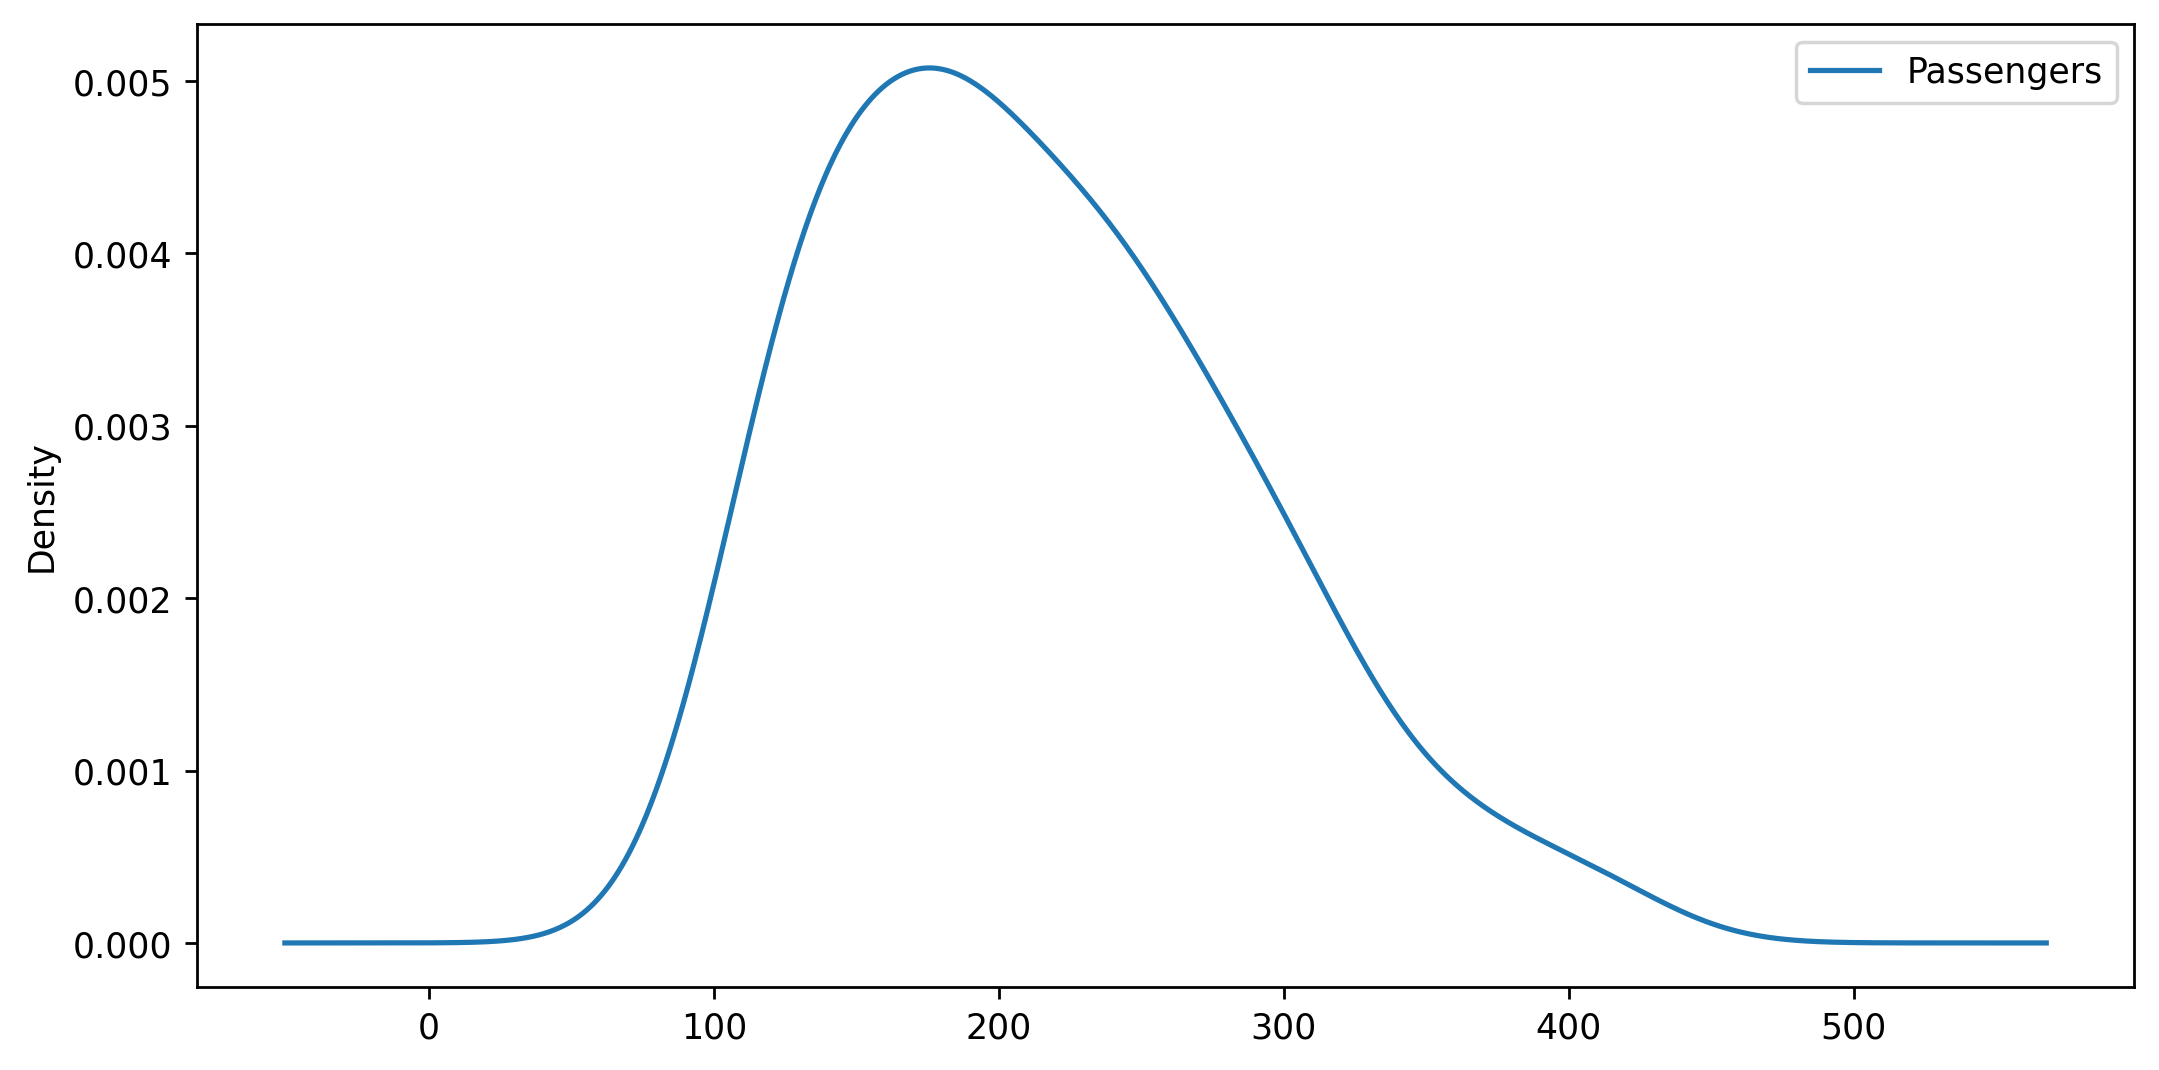

In [8]:
# it show the density plot
df.plot(kind='kde')

In [9]:
# diagram shows the presence of right skewness into the data

<AxesSubplot:xlabel='Passengers', ylabel='Density'>

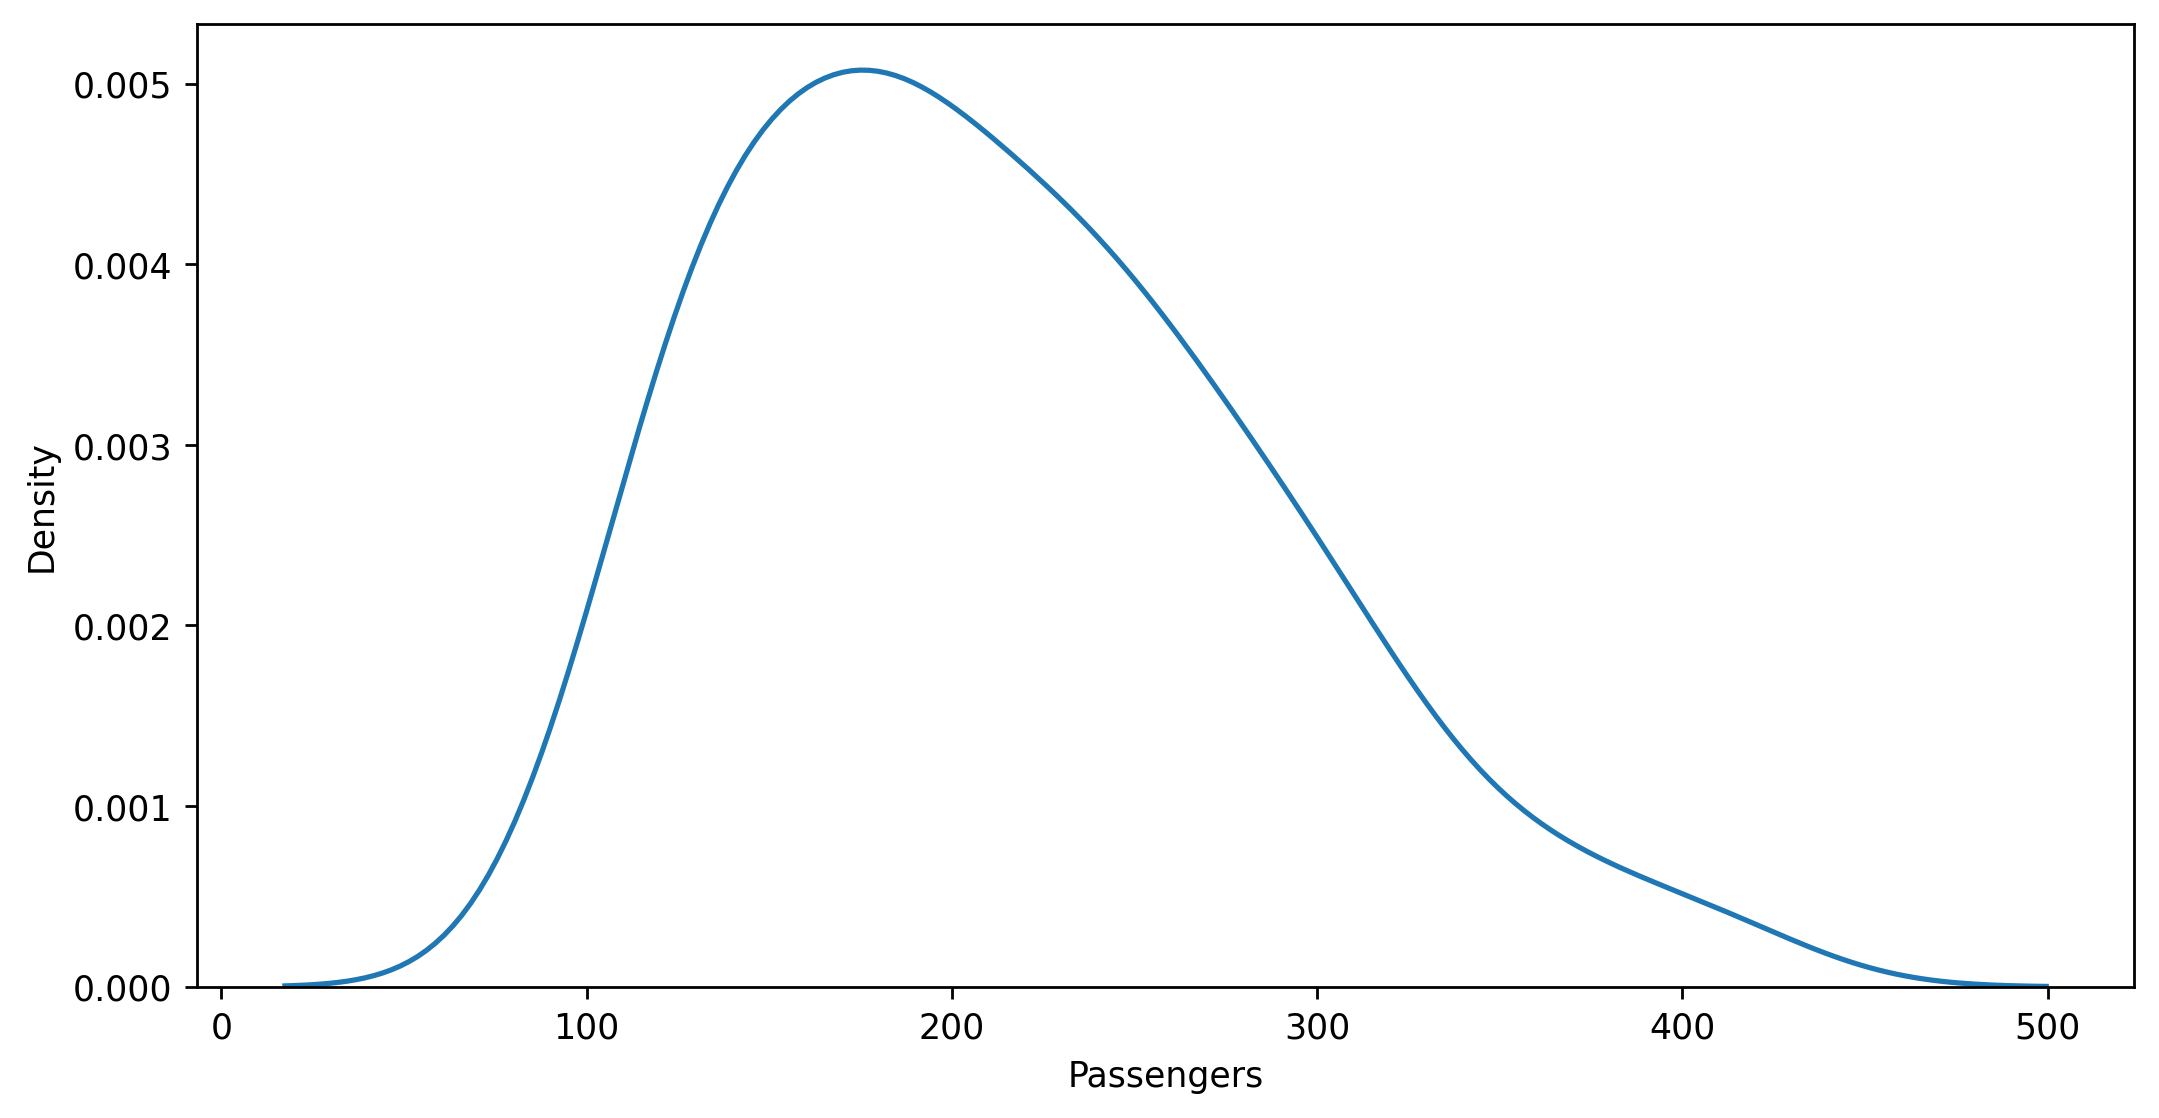

In [10]:
sns.kdeplot(df['Passengers'])

### Histogram  and Density plot

In [11]:
# create histogram plot
from pandas import read_csv

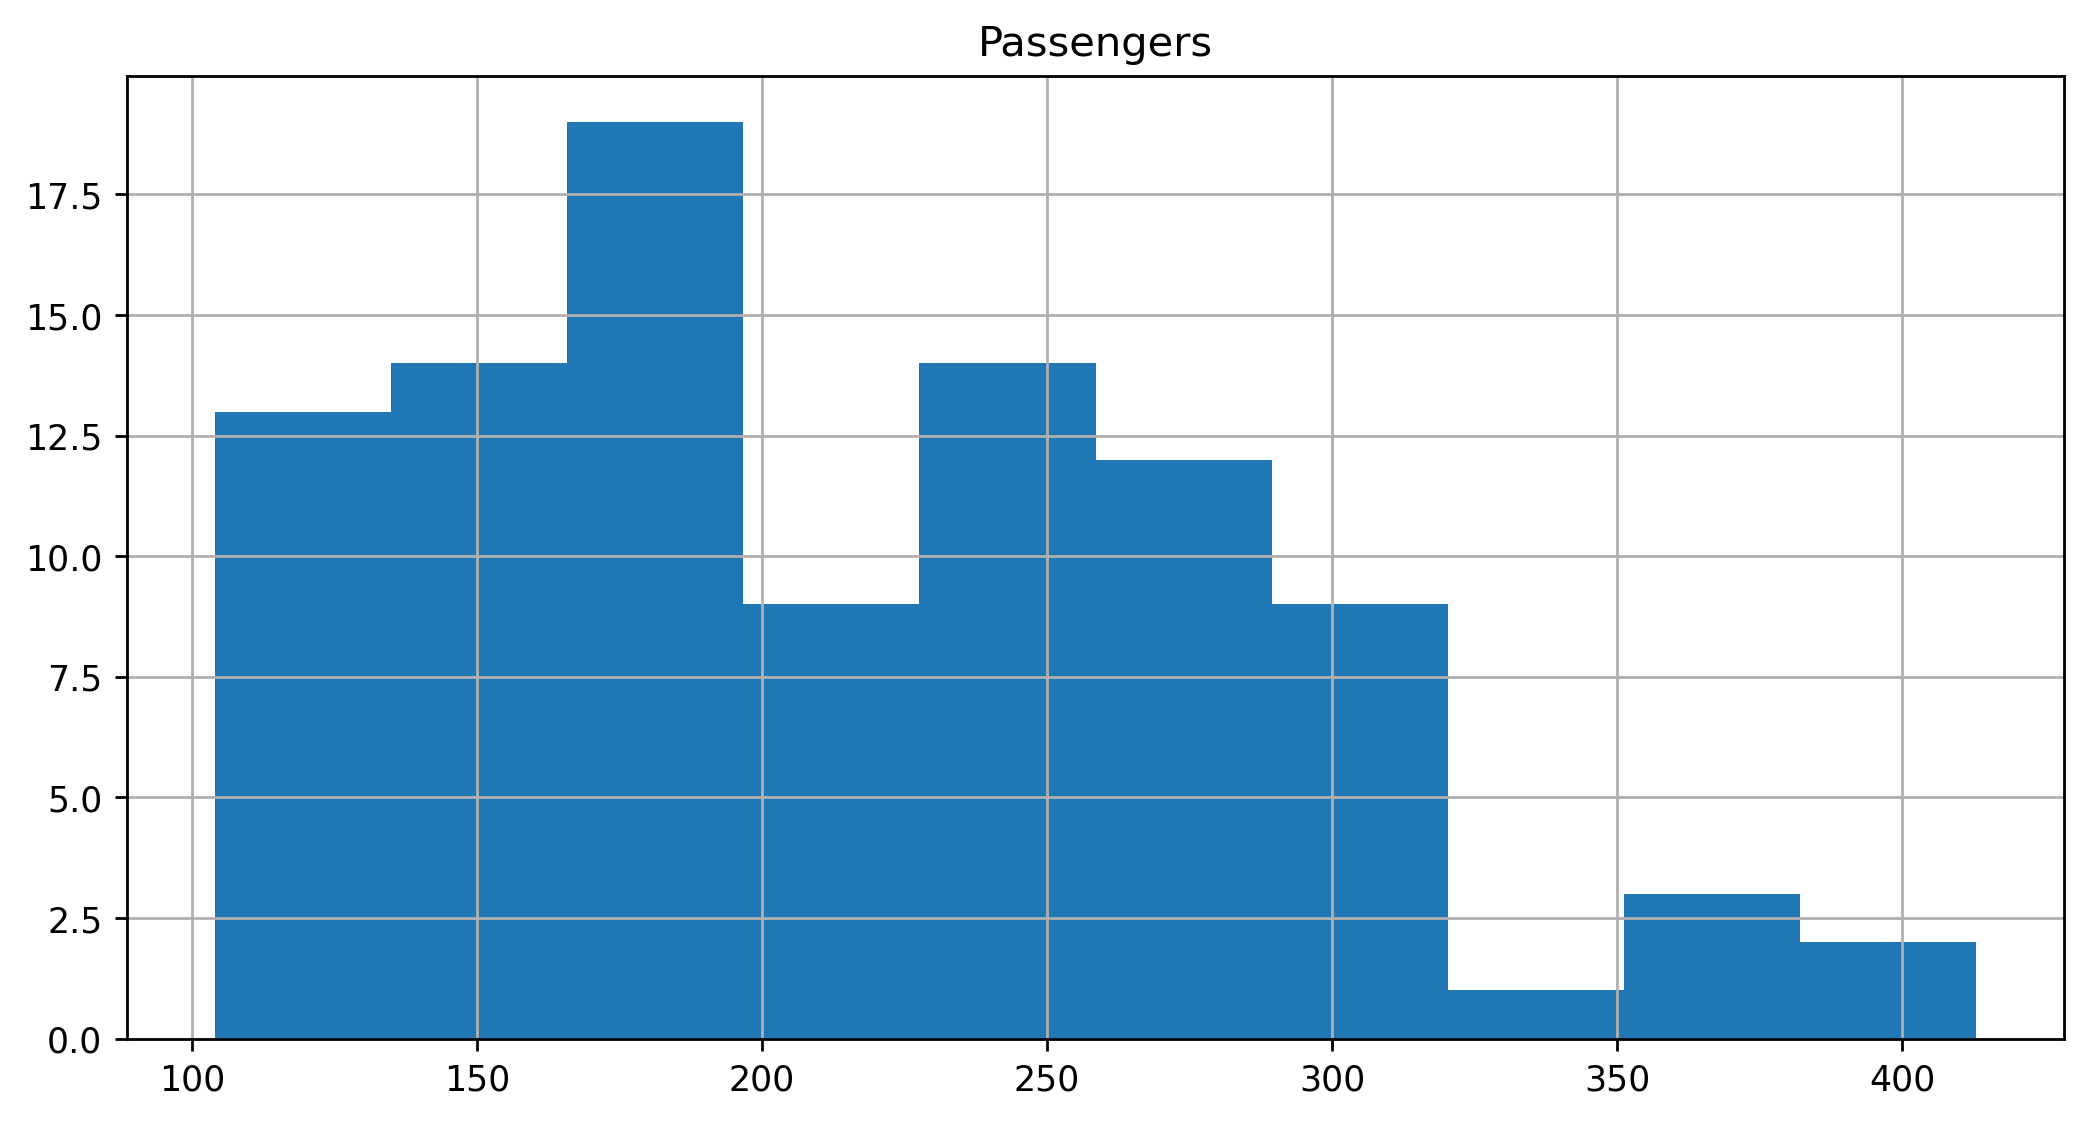

In [12]:
df.hist()
plt.show()

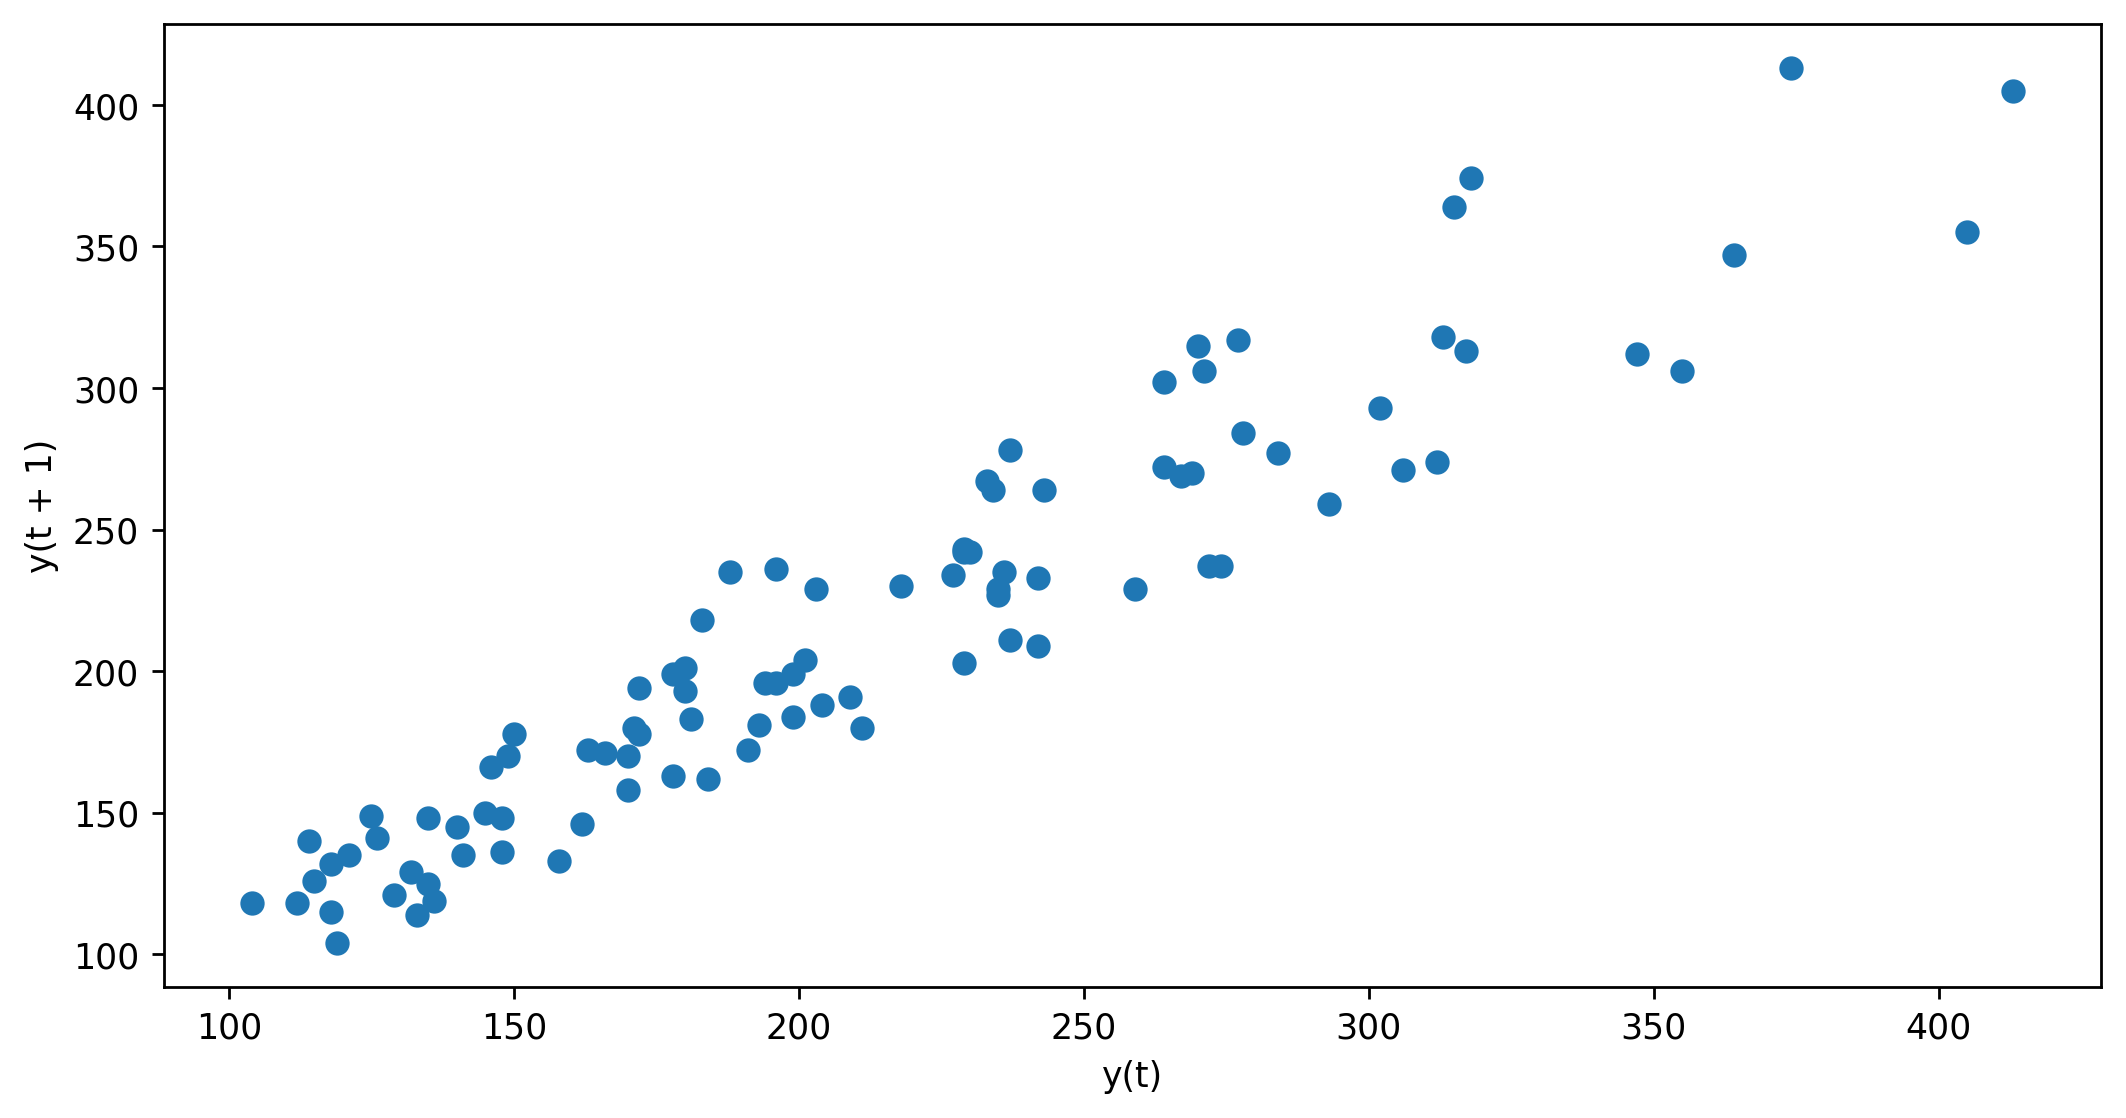

In [13]:
# create a scatter plot
from pandas.plotting import lag_plot
lag_plot(df)
plt.show()

- Diagram shows positive trend ,presenting current data on x-axis, and future data on y-axis ,diagra shows present data contributing to the future data.

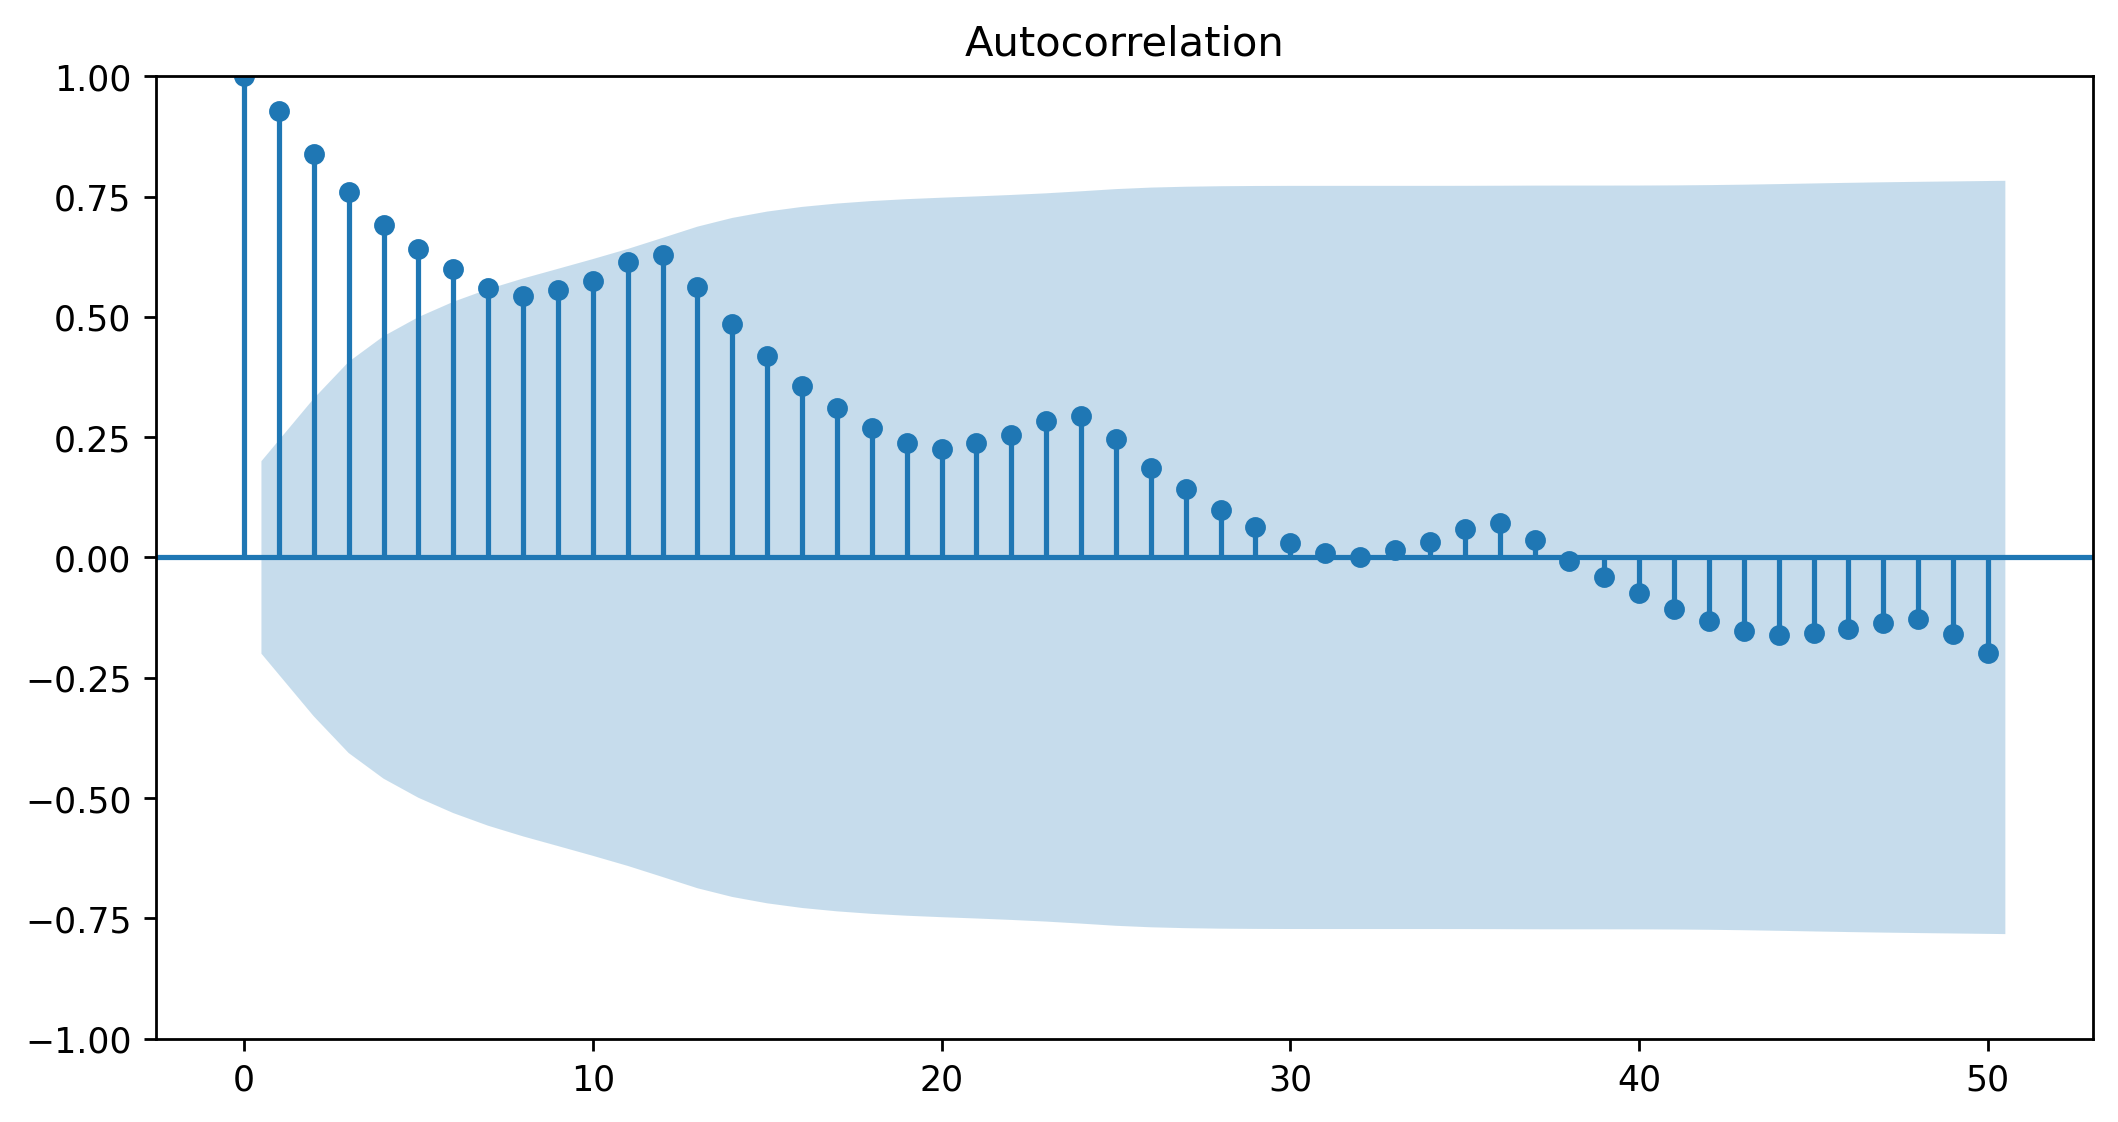

In [14]:
# create a autocorrelation plot
plot_acf(df,lags=50)
plt.show()

- first lag variable is not consider because it is aucorrelation between itself,and 2nd lag variable is direct impact on current data , 3rd-7th are having indirect impact on current data,like 7th impact on 6th,6th impact on 5th,5th impact on 4th,4th impact on 3rd.

In [15]:
# from Stationary data

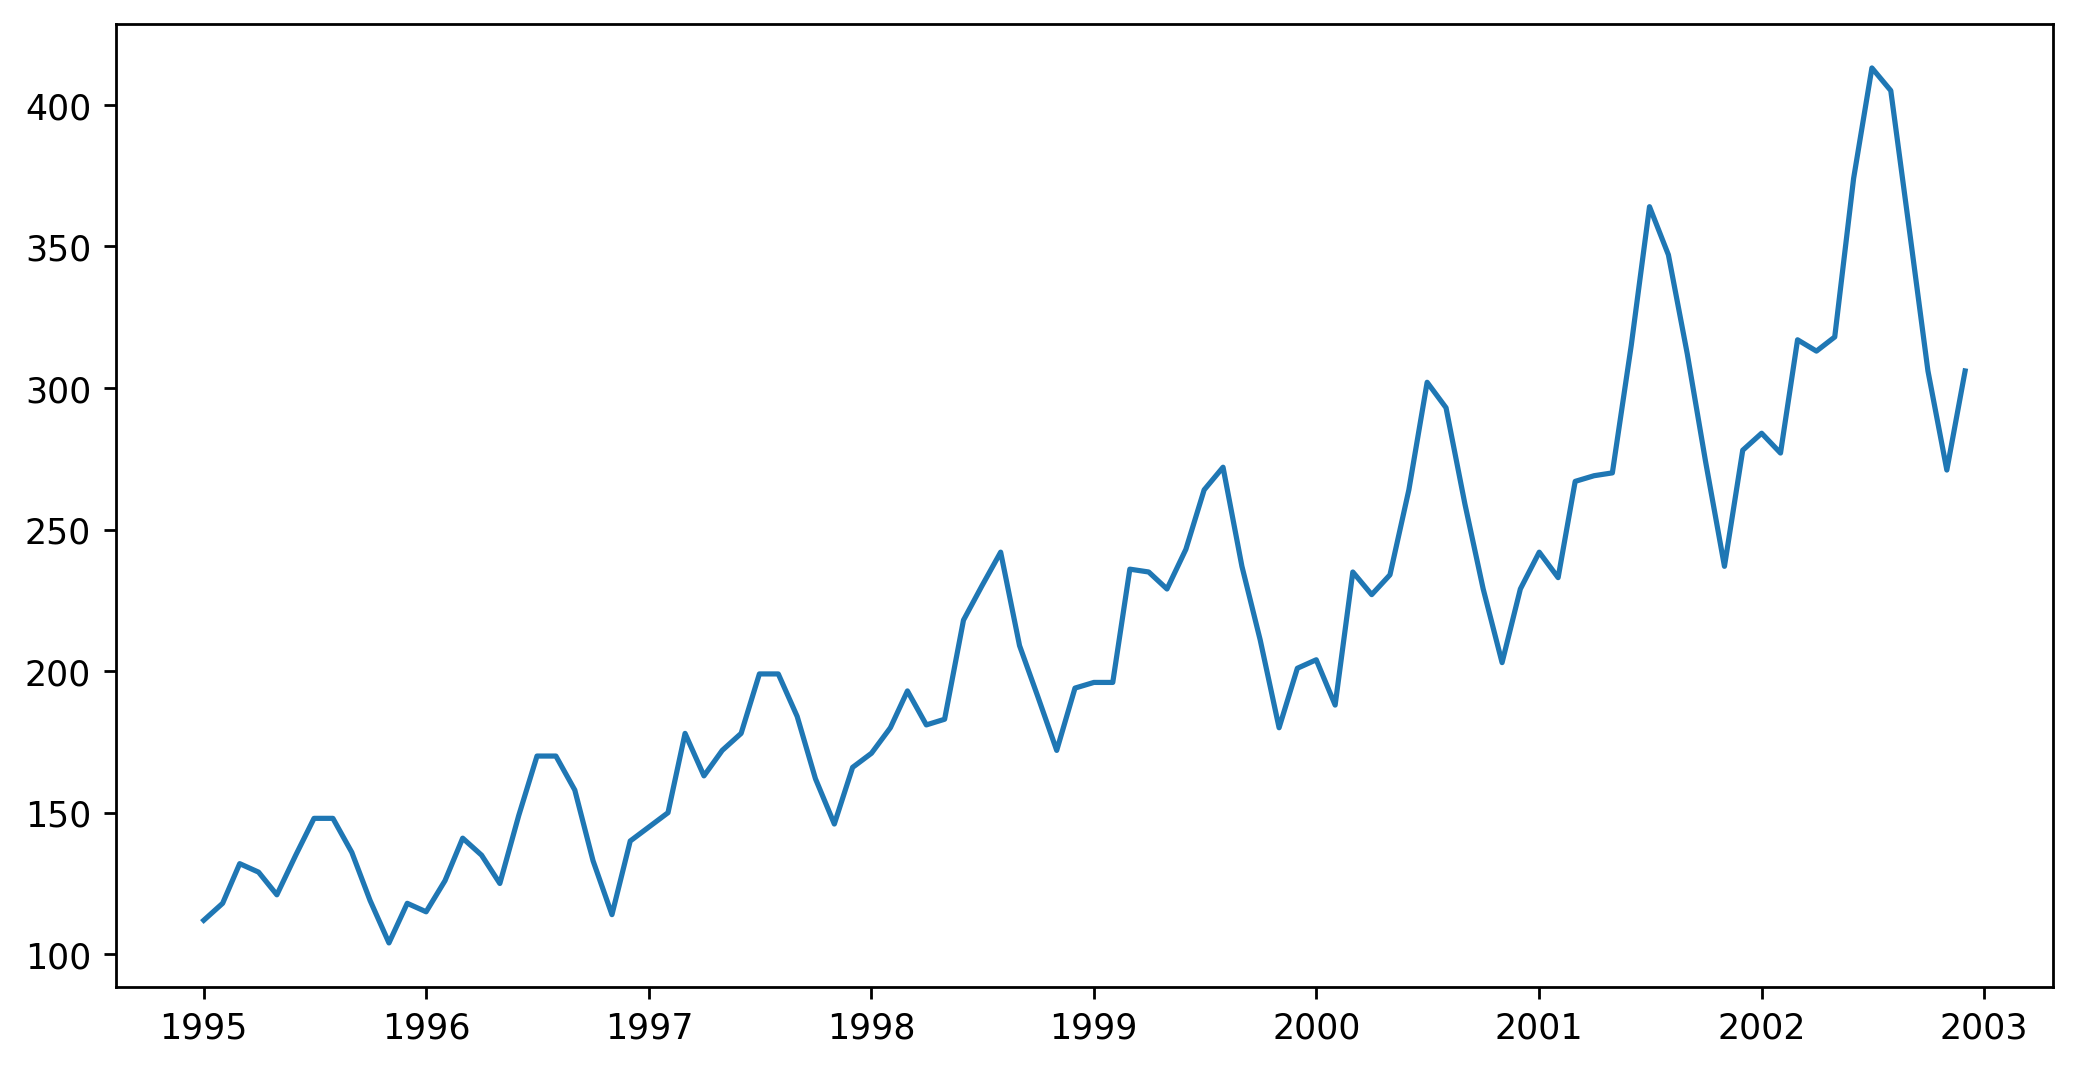

In [16]:
plt.plot(df['Passengers'])

- Diagram shows presences of positive trend and multiplicative seasonality.Daigram has trend which means data it non-stationary ,for model building we have form stationary data

# For stationary data
- the easiest way to makes time series data stationary is by calculating the first order differnece.

In [17]:
# first-order difference
df['first-order']=df['Passengers'].diff(periods=1)
df

,Passengers,first-order
Month,,
1995-01-01,112,NaN
1995-02-01,118,6.0
1995-03-01,132,14.0
1995-04-01,129,-3.0
1995-05-01,121,-8.0
...,...,...
2002-08-01,405,-8.0
2002-09-01,355,-50.0
2002-10-01,306,-49.0


In [18]:
# drop na 
df.dropna(inplace=True)

In [19]:
df.shape

(95, 2)

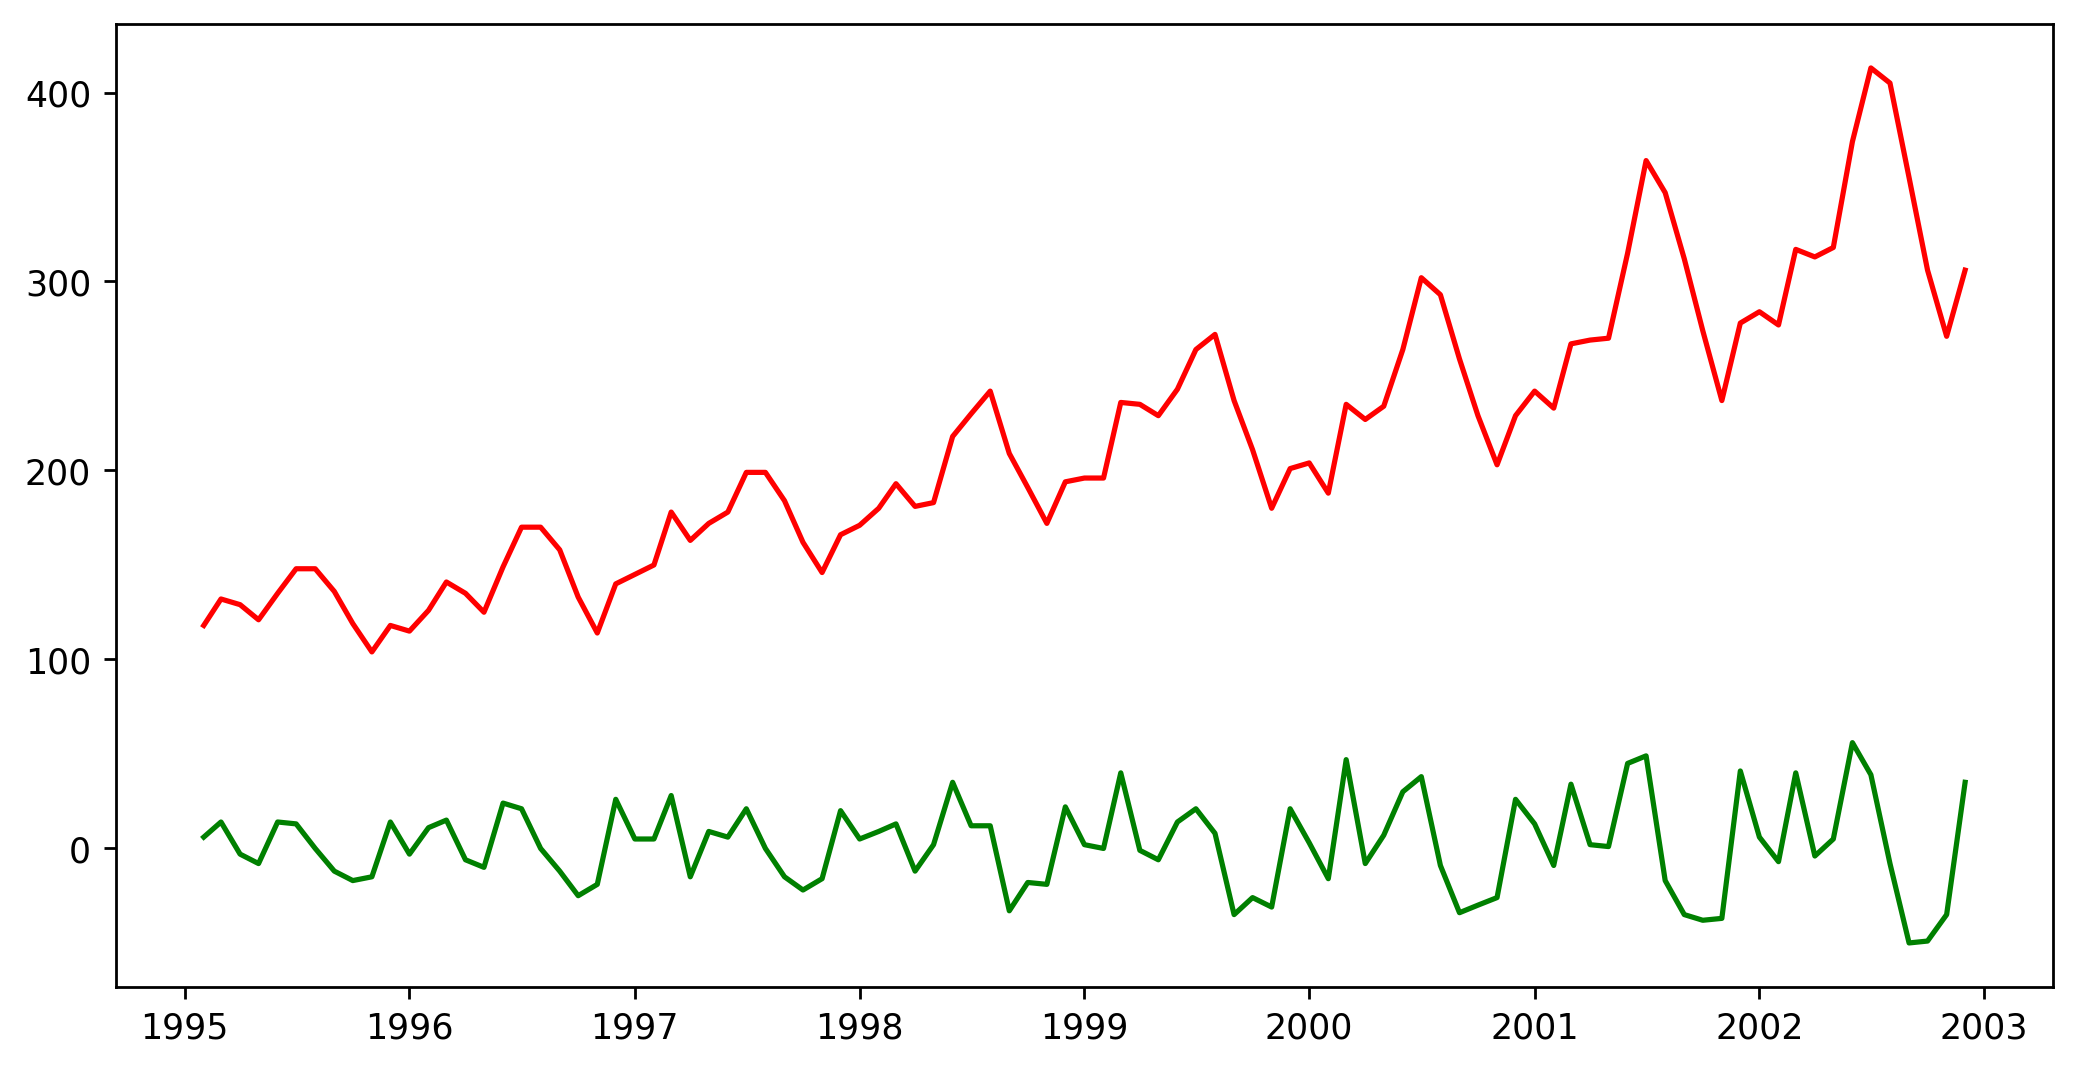

In [20]:
# plot
plt.plot(df['Passengers'], color='red',label = 'Passengers')
plt.plot(df['first-order'],color='green',label = 'First-Order')

# Plotting PAcf and ACF

In [21]:
# calculate autocorrelation for first-order
acf_values = acf(df['first-order'])
acf_values

array([ 1.        ,  0.24719303, -0.15621114, -0.19389898, -0.30091356,
       -0.07659995,  0.04937987, -0.11186081, -0.28940231, -0.12796419,
       -0.14189709,  0.23091956,  0.76784132,  0.2018499 , -0.14879414,
       -0.13854633, -0.23255484, -0.03403639,  0.00806283, -0.09009974])

-first value is 1,because a correlation between two identical series was calculated.but take look at 12nd period,which carries autocorrelation value is 0.76,this tells us that 12nd period ago has a strong impact on todays value.

(<Figure size 2500x1250 with 1 Axes>,)

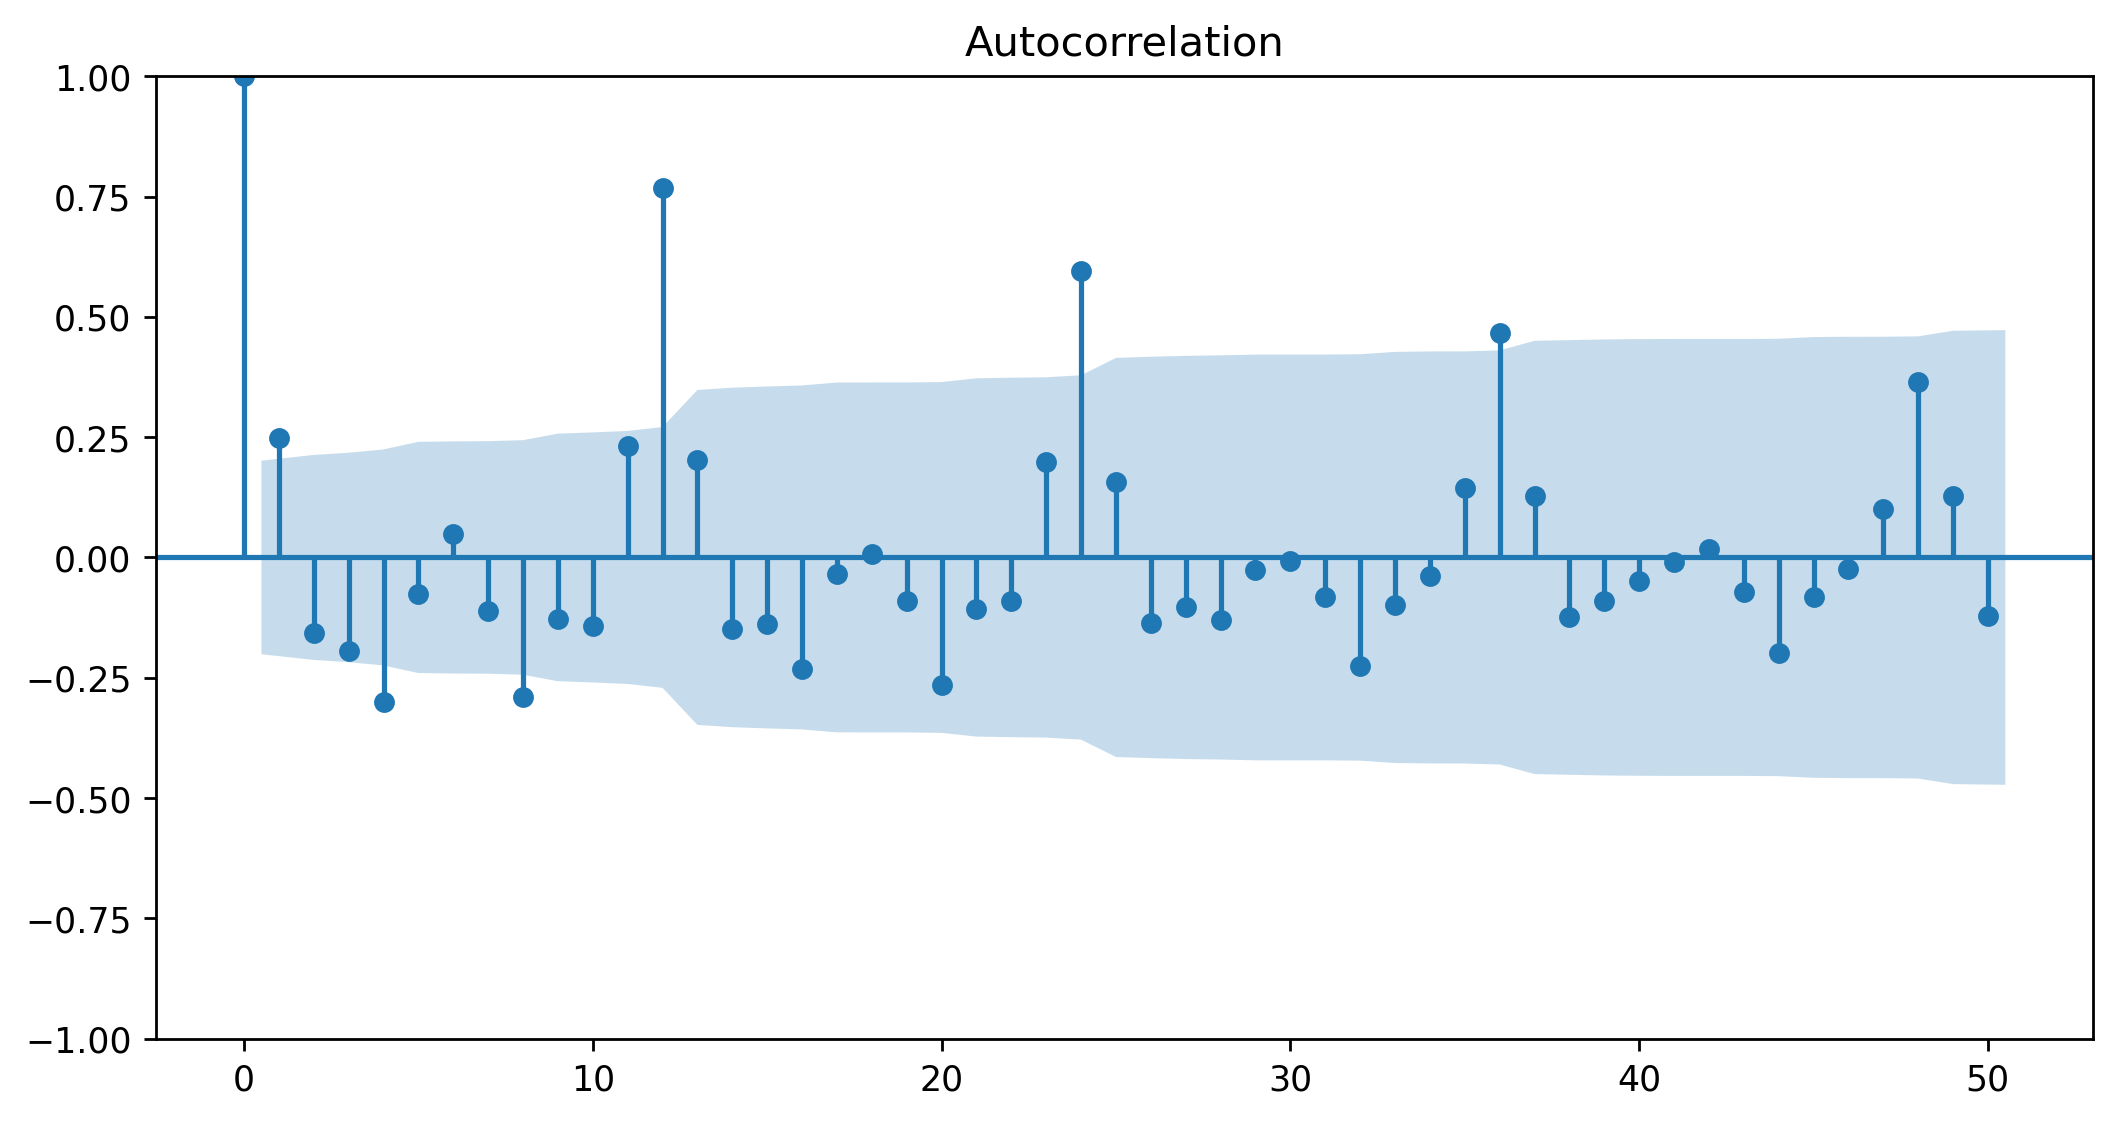

In [22]:
# plot ACF
plot_acf(df['first-order'],lags=50),

- This Diagram is more effective than passenger acf plot,it shows 12 period has strong impact on current values

In [23]:
# calculate pacf
pacf_values = pacf(df['first-order'])
pacf_values

array([ 1.00000000e+00,  2.49822741e-01, -2.36758342e-01, -1.03692905e-01,
       -3.01485928e-01,  2.23374632e-02, -8.40227411e-02, -2.53404035e-01,
       -4.46435582e-01, -2.23664740e-01, -6.53266123e-01, -3.65821471e-01,
        5.90496055e-01, -1.20748181e-01, -2.79572058e-01,  2.59046851e-01,
        4.43131573e-04, -1.03548748e-01, -2.89705180e-01,  3.92893315e-01])

- the autocorrelation at lag 12 has drop to 0.59,indication the direct realtionship is bit weaker

C:\Users\sanjana pal\anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


(<Figure size 2500x1250 with 1 Axes>,)

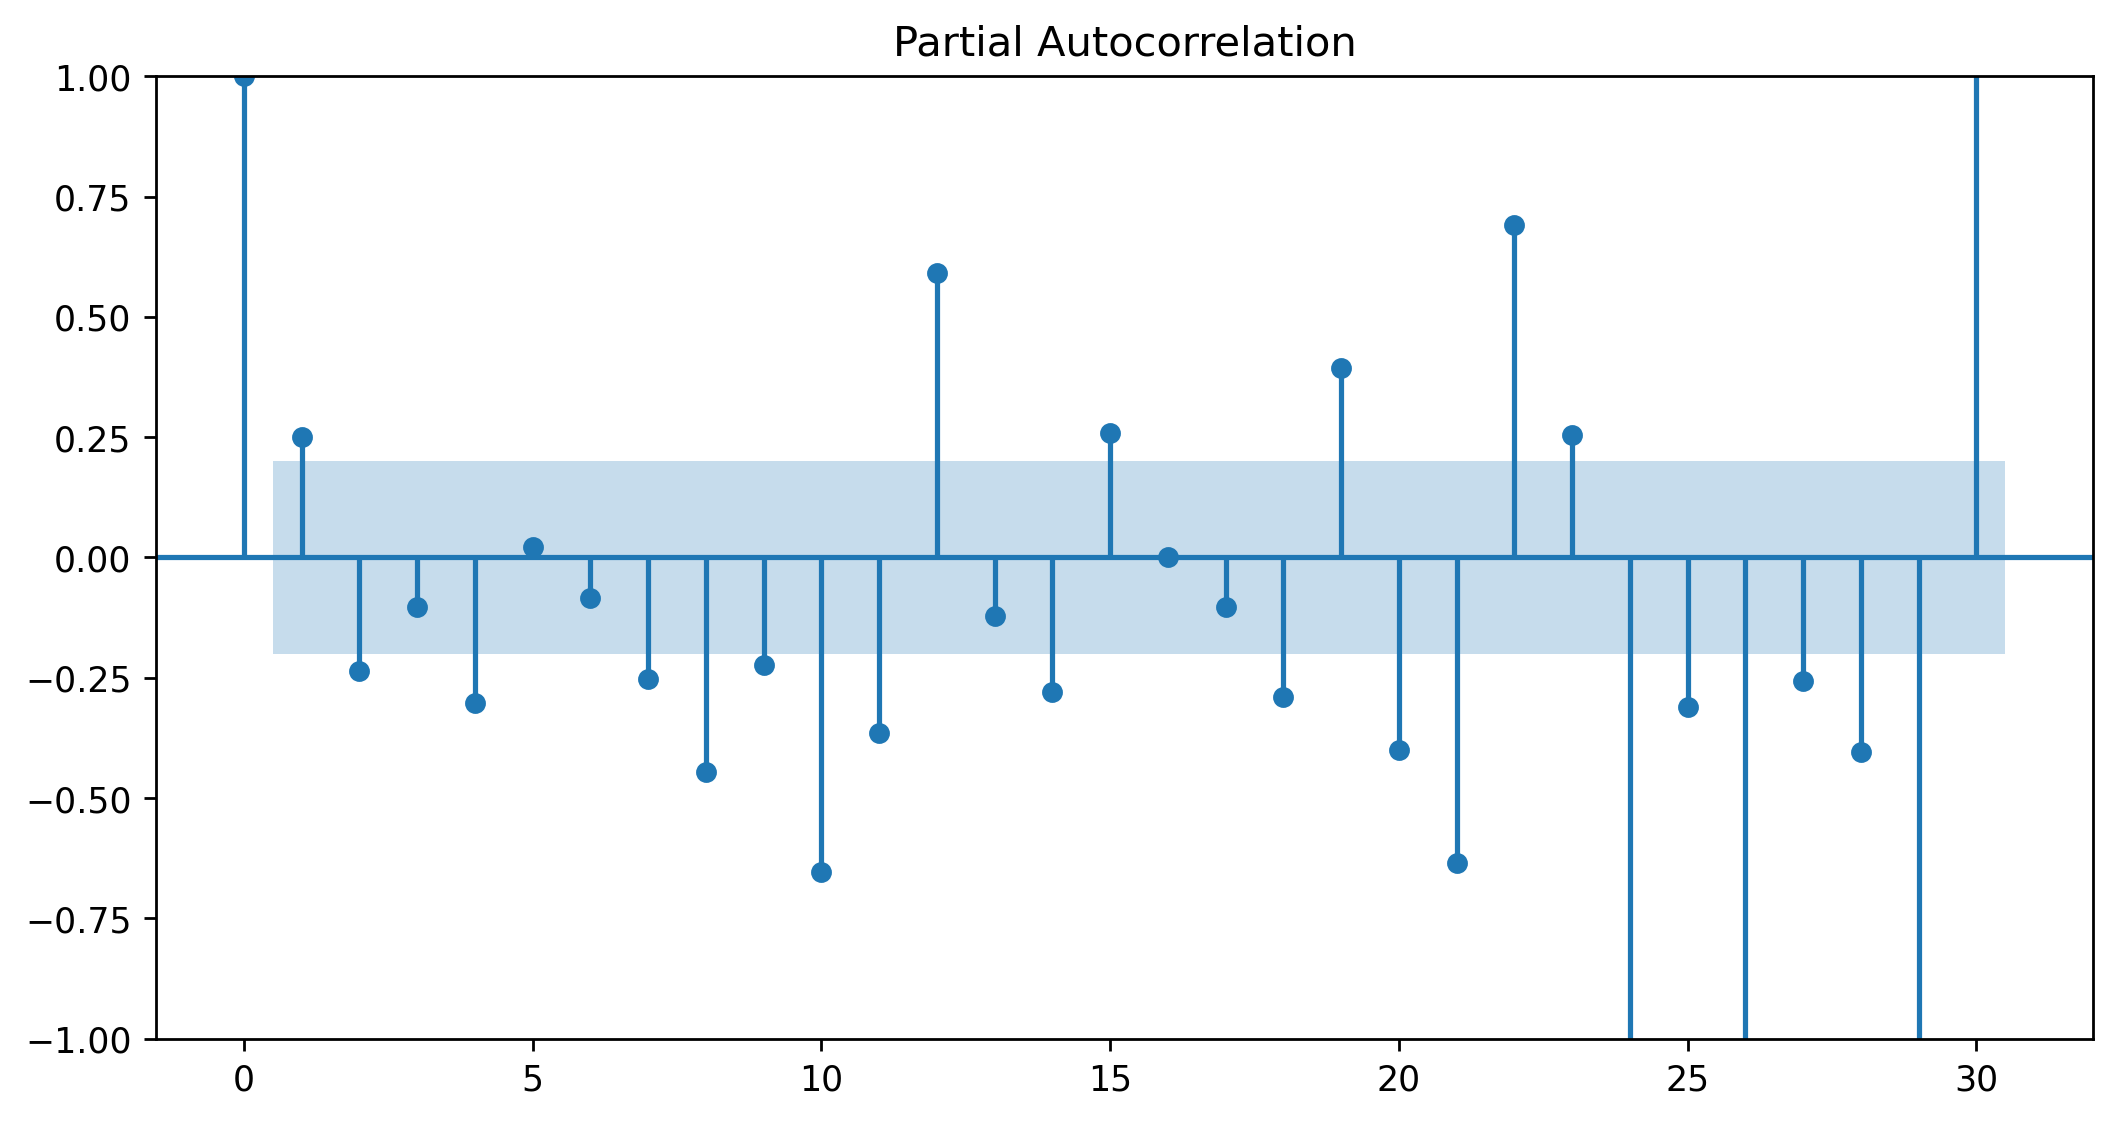

In [24]:
# plotting Pacf
plot_pacf(df['first-order'],lags=30),

# getting data ready w.r.t the equation variable we would need t,t_squared,log of passengers.Since all the different model requires different values

In [25]:
# impoting data again for model building

In [26]:
df1 = pd.read_excel('Airlines+Data.xlsx')

<AxesSubplot:>

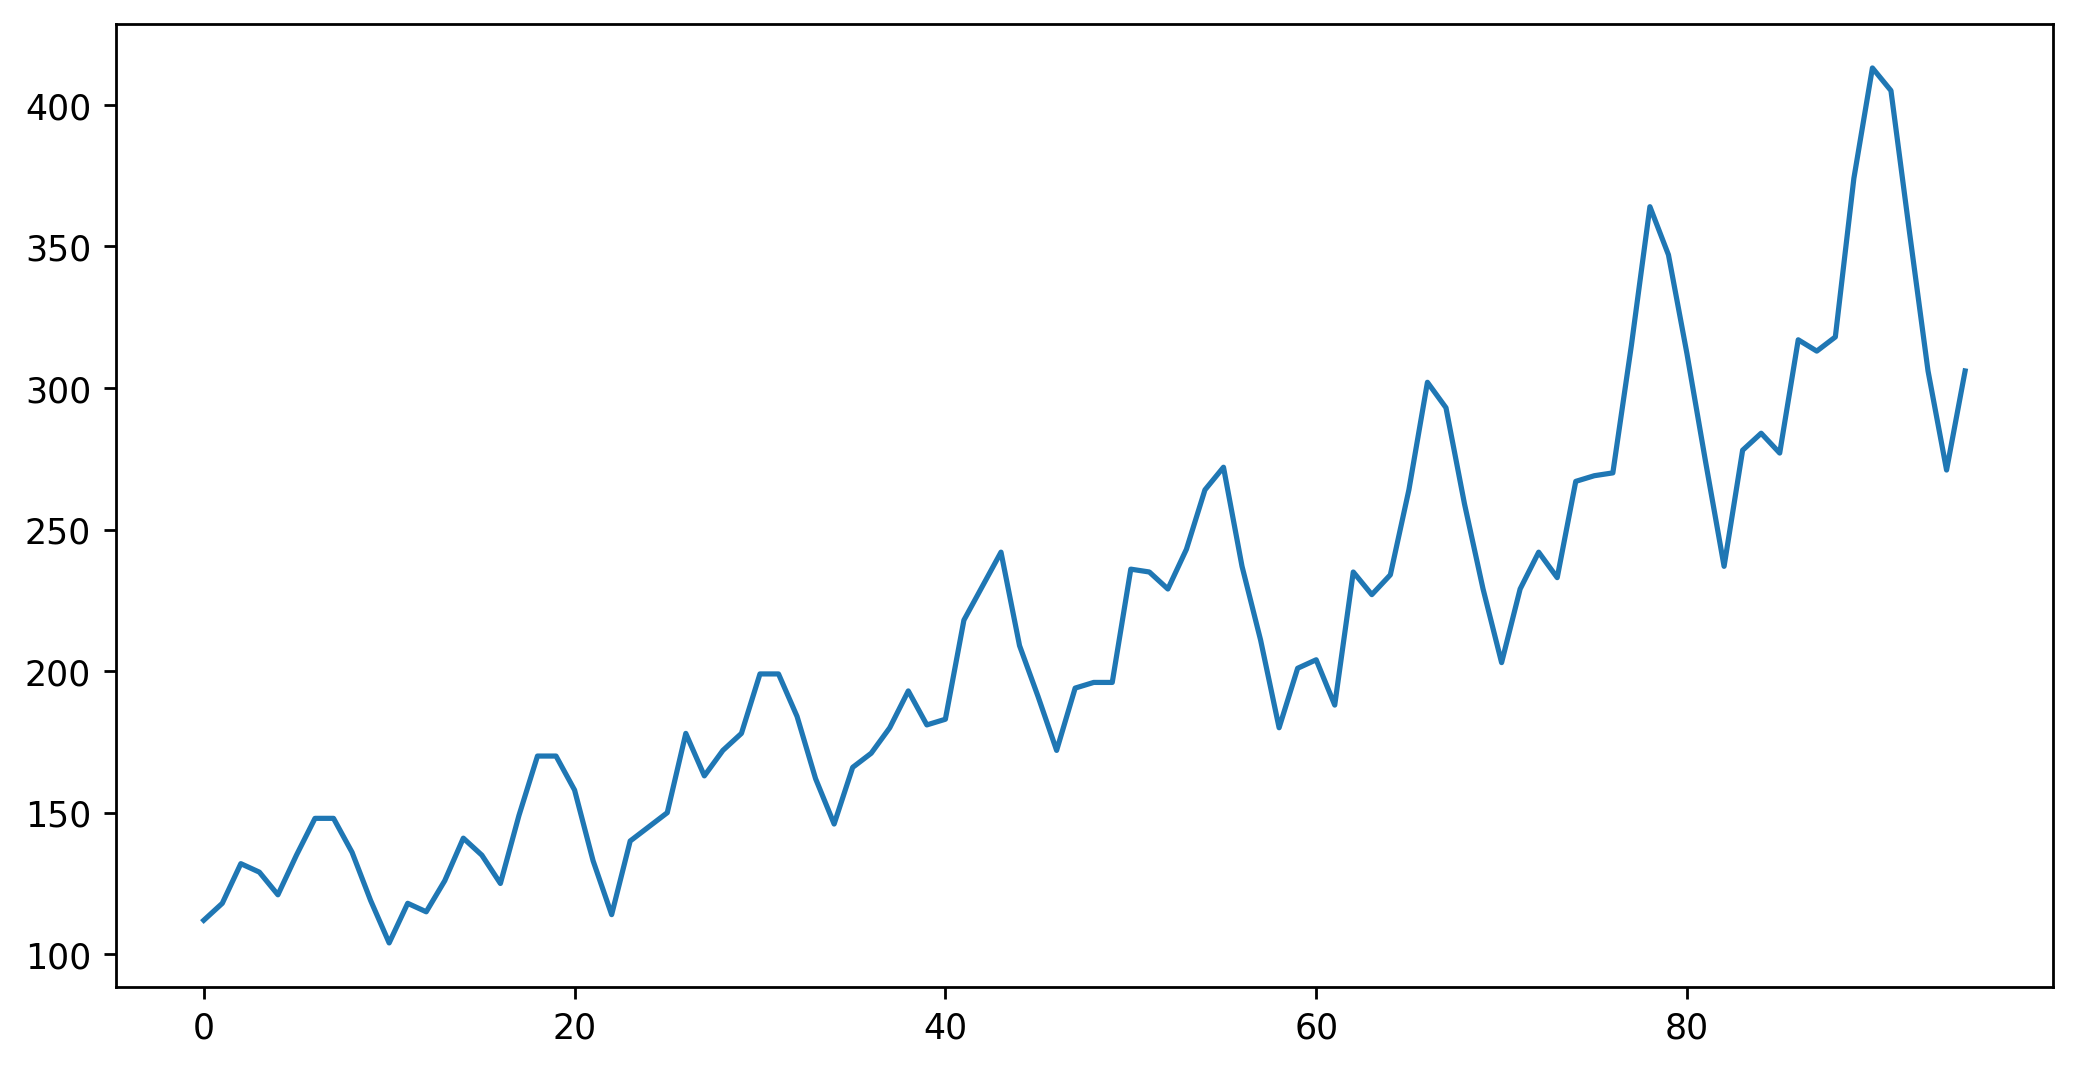

In [27]:
df1.Passengers.plot()

- diagram has multiplicative seasonality and quadratic trend

In [28]:
# create t column
df1['t'] = range(1,97)
df1

,Month,Passengers,t
0,1995-01-01,112,1
1,1995-02-01,118,2
2,1995-03-01,132,3
3,1995-04-01,129,4
4,1995-05-01,121,5
...,...,...,...
91,2002-08-01,405,92
92,2002-09-01,355,93
93,2002-10-01,306,94
94,2002-11-01,271,95


In [29]:
# created t_squared column
df1['t_squared'] = df1['t']**2

In [30]:
# create log column of passenger
df1['log_passengers']= np.log(df1['Passengers'])
df1

,Month,Passengers,t,t_squared,log_passengers
0,1995-01-01,112,1,1,4.718499
1,1995-02-01,118,2,4,4.770685
2,1995-03-01,132,3,9,4.882802
3,1995-04-01,129,4,16,4.859812
4,1995-05-01,121,5,25,4.795791
...,...,...,...,...,...
91,2002-08-01,405,92,8464,6.003887
92,2002-09-01,355,93,8649,5.872118
93,2002-10-01,306,94,8836,5.723585
94,2002-11-01,271,95,9025,5.602119


In [31]:
# convert month column into datetime object
df1['Month']= pd.to_datetime(df1['Month'])
df1

,Month,Passengers,t,t_squared,log_passengers
0,1995-01-01,112,1,1,4.718499
1,1995-02-01,118,2,4,4.770685
2,1995-03-01,132,3,9,4.882802
3,1995-04-01,129,4,16,4.859812
4,1995-05-01,121,5,25,4.795791
...,...,...,...,...,...
91,2002-08-01,405,92,8464,6.003887
92,2002-09-01,355,93,8649,5.872118
93,2002-10-01,306,94,8836,5.723585
94,2002-11-01,271,95,9025,5.602119


In [32]:
# creating dummy variable for each month
dummy_months = pd.get_dummies(df1['Month'].dt.month, prefix='Month')

In [33]:
# convert dummy_months column into int
dummy_months = dummy_months.astype(int)

In [34]:
# concatinate df1 and dummy_months columns
df1 = pd.concat([df1,dummy_months],axis=1)

In [35]:
df1

,Month,Passengers,t,t_squared,log_passengers,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
0,1995-01-01,112,1,1,4.718499,1,0,0,0,0,0,0,0,0,0,0,0
1,1995-02-01,118,2,4,4.770685,0,1,0,0,0,0,0,0,0,0,0,0
2,1995-03-01,132,3,9,4.882802,0,0,1,0,0,0,0,0,0,0,0,0
3,1995-04-01,129,4,16,4.859812,0,0,0,1,0,0,0,0,0,0,0,0
4,1995-05-01,121,5,25,4.795791,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,92,8464,6.003887,0,0,0,0,0,0,0,1,0,0,0,0
92,2002-09-01,355,93,8649,5.872118,0,0,0,0,0,0,0,0,1,0,0,0
93,2002-10-01,306,94,8836,5.723585,0,0,0,0,0,0,0,0,0,1,0,0
94,2002-11-01,271,95,9025,5.602119,0,0,0,0,0,0,0,0,0,0,1,0


In [36]:
# extracting date,weekday name,month name,years using date function from pandas
df1["Date"] = pd.to_datetime(df1.Month,format="%b-%y")

In [37]:
df1["year"] = df1['Date'].dt.strftime("%Y")

<AxesSubplot:xlabel='year', ylabel='Passengers'>

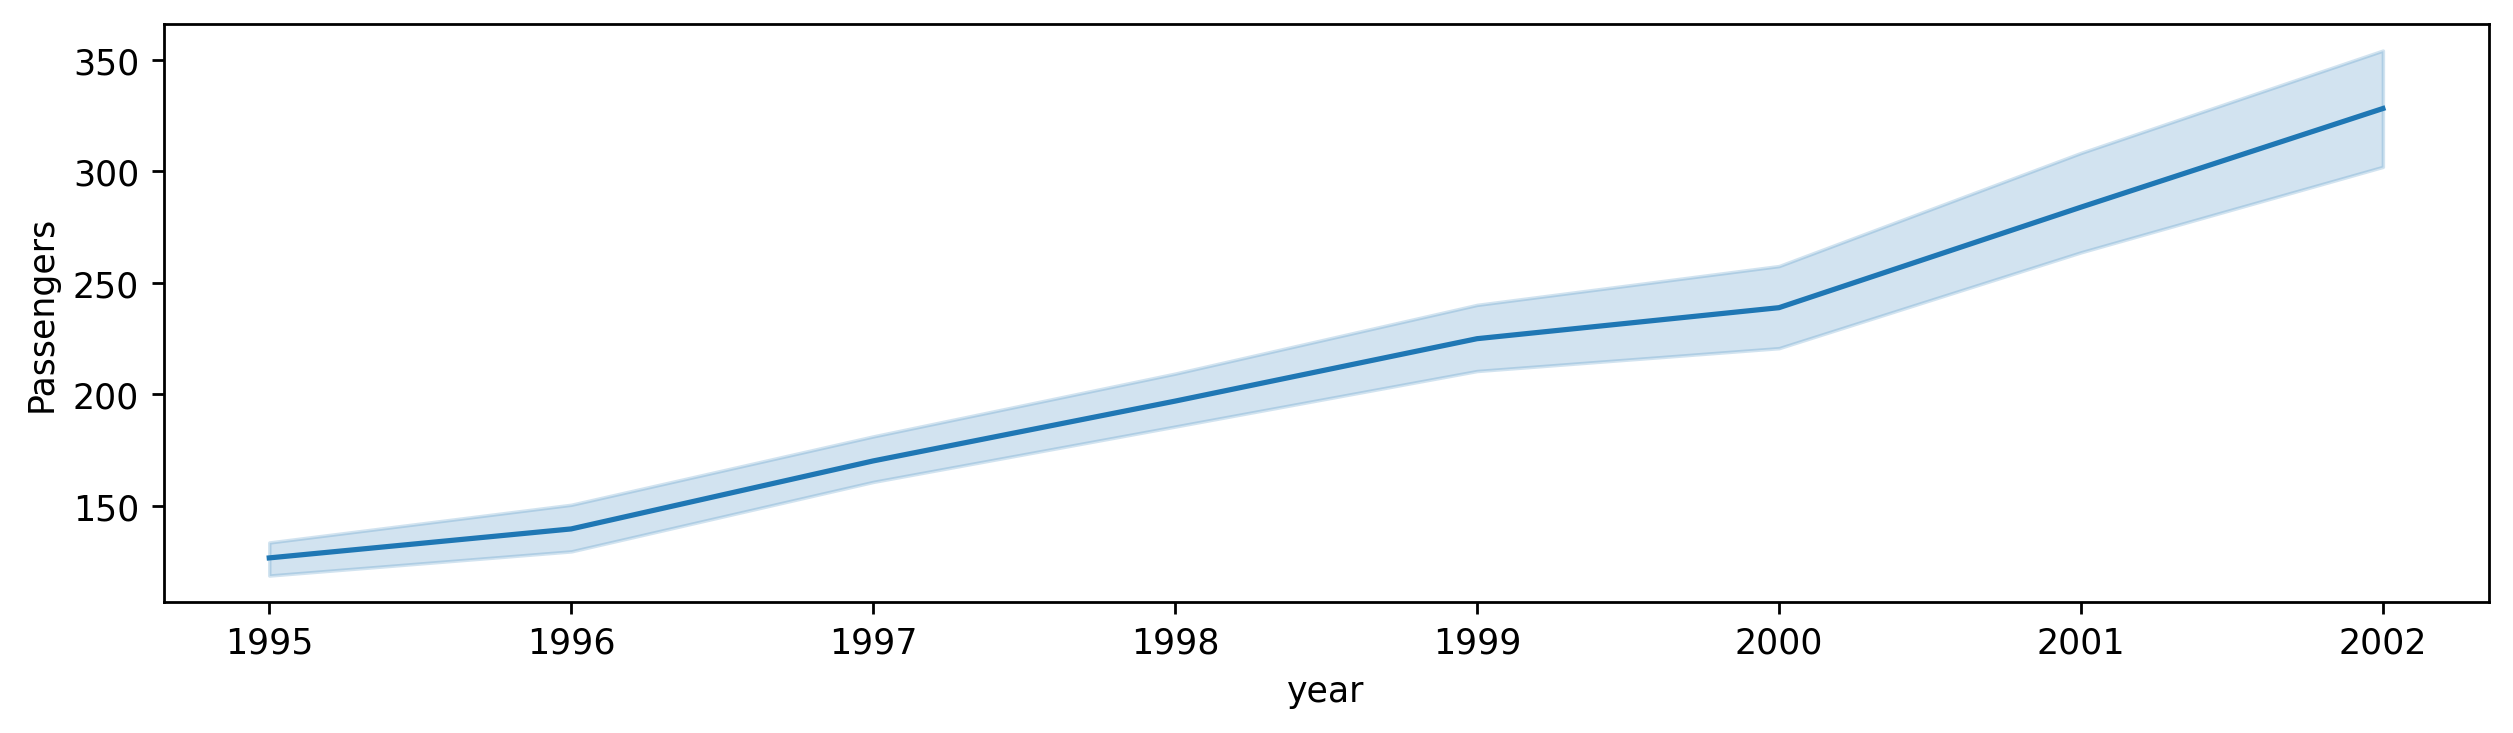

In [38]:
# line plot
plt.figure(figsize=(12,3))
sns.lineplot(x='year',y = "Passengers",data =df1)

- Lineplot between years and passengers is having quadratic trend

# Splitting  data


In [39]:
df1.shape

(96, 19)

In [40]:
# splitting the data into train and test
train = df1.head(80)
test = df1.tail(16)

In [41]:
train

,Month,Passengers,t,t_squared,log_passengers,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,Date,year
0,1995-01-01,112,1,1,4.718499,1,0,0,0,0,0,0,0,0,0,0,0,1995-01-01,1995
1,1995-02-01,118,2,4,4.770685,0,1,0,0,0,0,0,0,0,0,0,0,1995-02-01,1995
2,1995-03-01,132,3,9,4.882802,0,0,1,0,0,0,0,0,0,0,0,0,1995-03-01,1995
3,1995-04-01,129,4,16,4.859812,0,0,0,1,0,0,0,0,0,0,0,0,1995-04-01,1995
4,1995-05-01,121,5,25,4.795791,0,0,0,0,1,0,0,0,0,0,0,0,1995-05-01,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,2001-04-01,269,76,5776,5.594711,0,0,0,1,0,0,0,0,0,0,0,0,2001-04-01,2001
76,2001-05-01,270,77,5929,5.598422,0,0,0,0,1,0,0,0,0,0,0,0,2001-05-01,2001
77,2001-06-01,315,78,6084,5.752573,0,0,0,0,0,1,0,0,0,0,0,0,2001-06-01,2001
78,2001-07-01,364,79,6241,5.897154,0,0,0,0,0,0,1,0,0,0,0,0,2001-07-01,2001


In [42]:
# model building

In [43]:
# linear equation
import statsmodels.formula.api as smf

linear_model = smf.ols('Passengers~t',data=train).fit()
pred_linear = linear_model.predict(pd.DataFrame(test['t']))
rmse_linear = np.sqrt(mean_squared_error(test['Passengers'],pred_linear))
rmse_linear

47.542624067726756

In [44]:
# expoenetial
exp = smf.ols('log_passengers~t',data=train).fit()
pred_exp = exp.predict(pd.DataFrame(test['t']))
rmse_exp = np.sqrt(mean_squared_error(test['Passengers'],pred_exp))
rmse_exp

312.8892354482463

In [45]:
# Quadratic
Quad = smf.ols('Passengers~t+t_squared',data=train).fit()
pred_quad = Quad.predict(pd.DataFrame(test[["t","t_squared"]]))
rmse_quad = np.sqrt(mean_squared_error(test['Passengers'],pred_quad))
rmse_quad

43.65440369584207

In [46]:
# Additive seasonality
Add_sea = smf.ols('Passengers~Month_1+Month_2+Month_3+Month_4+Month_5+Month_6+Month_7+Month_8+Month_9+Month_10+Month_11',data=train).fit()
pred_add_sea = Add_sea.predict(pd.DataFrame(test[['Month_1','Month_2','Month_3','Month_4','Month_5','Month_6','Month_7','Month_8','Month_9','Month_10','Month_11']]))
rmse_add_sea = np.sqrt(mean_squared_error(test['Passengers'],pred_add_sea))
rmse_add_sea

129.26647641443313

In [47]:
# Additive Seasonality Quadratic
Add_sea_qu = smf.ols('Passengers~t+t_squared+Month_1+Month_2+Month_3+Month_4+Month_5+Month_6+Month_7+Month_8+Month_9+Month_10+Month_11',data=train).fit()
pred_add_sea_qu = Add_sea_qu.predict(pd.DataFrame(test[['t','t_squared','Month_1','Month_2','Month_3','Month_4','Month_5','Month_6','Month_7','Month_8','Month_9','Month_10','Month_11']]))
rmse_add_sea_qu = np.sqrt(mean_squared_error(test['Passengers'],pred_add_sea_qu))
rmse_add_sea_qu

23.910983570107373

In [48]:
# Multiplicative Seasonality
Mul_sea = smf.ols('log_passengers~t++Month_1+Month_2+Month_3+Month_4+Month_5+Month_6+Month_7+Month_8+Month_9+Month_10+Month_11',data=train).fit()
pred_Mul_sea = Mul_sea.predict(pd.DataFrame(test[['t','Month_1','Month_2','Month_3','Month_4','Month_5','Month_6','Month_7','Month_8','Month_9','Month_10','Month_11']]))
rmse_Mul_sea = np.sqrt(mean_squared_error(test['Passengers'],pred_Mul_sea))
rmse_Mul_sea

312.90871517511727

In [49]:
# Comparing the result
data = {"MODEL":pd.Series(["rmse_linear","rmse_exp","rmse_quad","rmse_add_sea","rmse_add_sea_qu","rmse_Mul_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_exp,rmse_quad,rmse_add_sea,rmse_add_sea_qu,rmse_Mul_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
4,rmse_add_sea_qu,23.910984
2,rmse_quad,43.654404
0,rmse_linear,47.542624
3,rmse_add_sea,129.266476
1,rmse_exp,312.889235
5,rmse_Mul_sea,312.908715


### rmse value of additive seation quadratic is very low ,so we are selecting this model.

# Moving Average

- Moving average deals with Noise
- it remove disortion

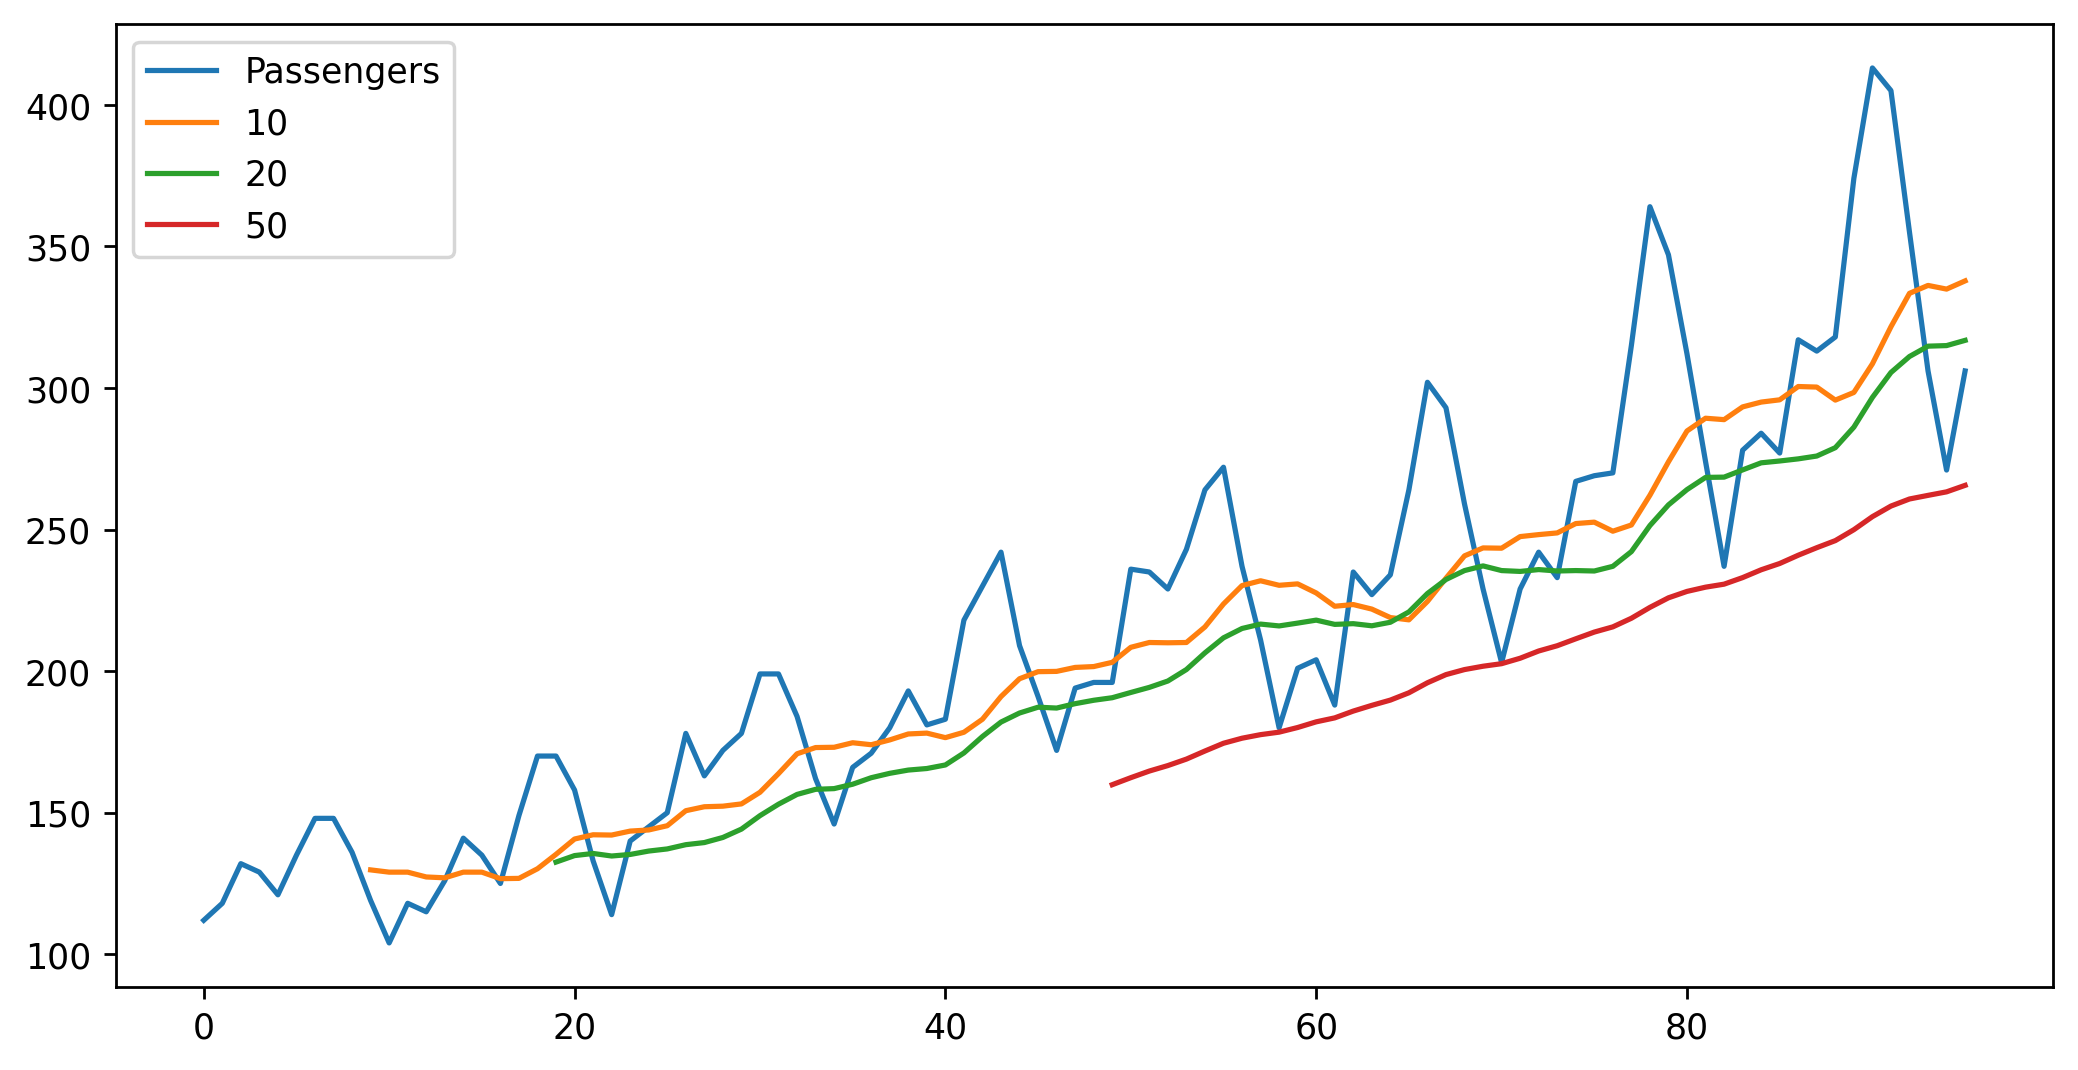

In [50]:
df1['Passengers'].plot()
df1['Passengers'].rolling(10).mean().plot(label = '10')
df1['Passengers'].rolling(20).mean().plot(label = '20')
df1['Passengers'].rolling(50).mean().plot(label = 50)
plt.legend()

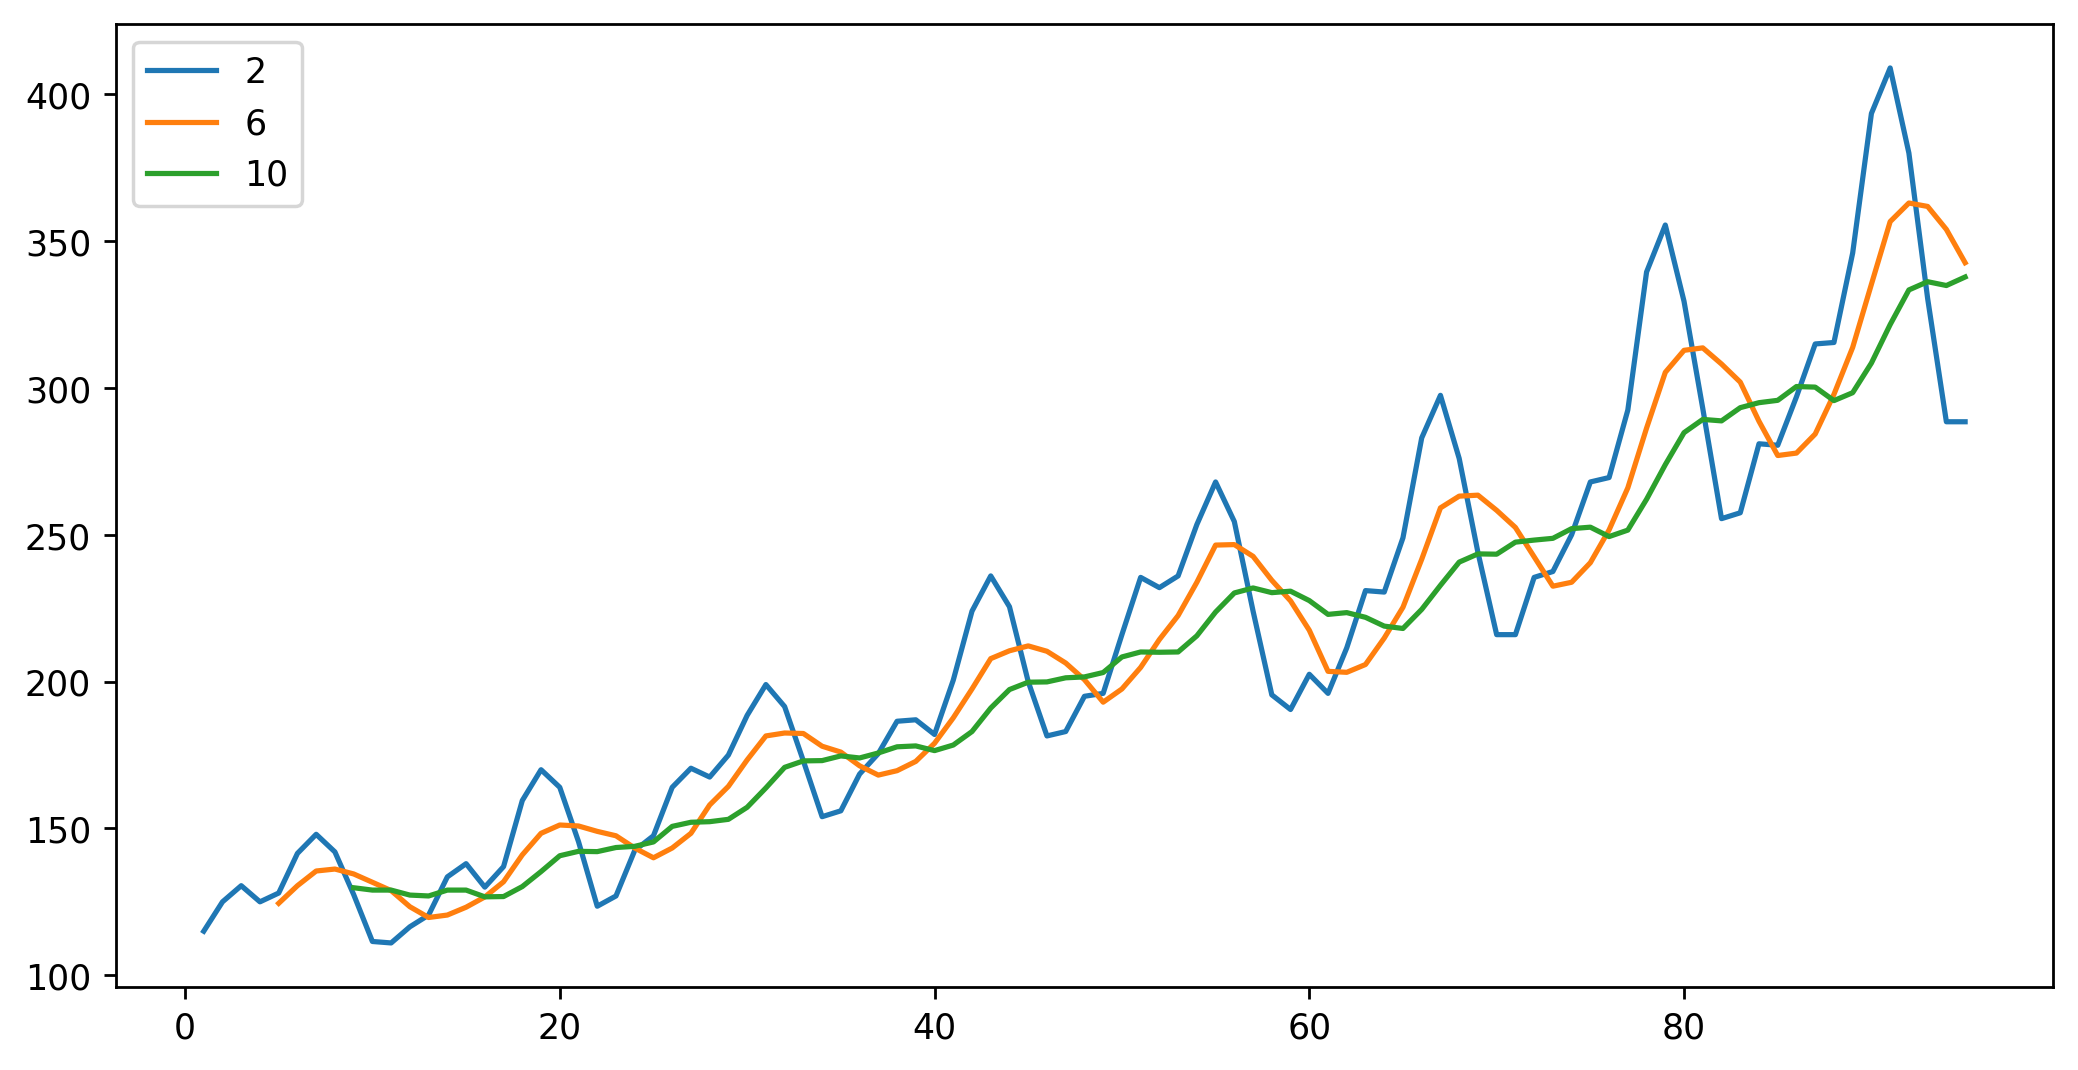

In [51]:
for i in range(2,12,4):
    df1['Passengers'].rolling(i).mean().plot(label=str(i))
    plt.legend()